In [ ]:
import pandas as pd
import numpy as np
import utils

# Plotting library
from matplotlib import pyplot
import matplotlib as mpl


import matplotlib.pyplot as plt  # Matlab-style plotting
from matplotlib import pyplot

#for spliting and training dataset
from sklearn.model_selection import train_test_split

#for finding skewness and kurtosis
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#for disble extra notes for warning
pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [3]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [4]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(train.shape))

all_data size is : (1460, 80)


    Lets see how it look like top 5 records

In [5]:
all_data.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

well yeah! when i look at top 5 record of this data i found out 
- there are different feature have numerical feature of different Range so i need to be normalize later we will see it
- there is also features having catagorical data 

Now let's see how Many feature are Catagorical and how many we have numerical.There is also need to find out how many missing value we have in both catagorical and numerial. It is also important to find out Reason why our data is missing values.


    Total number of Feature 

In [6]:
len(all_data.columns)

79

Total Catagorical Feature object dtypes

In [7]:
# df_train[df_train.dtypes[df_train.dtypes=='object'].index]
print("total catagorical feature",len(all_data.dtypes[train.dtypes=='object']))
# train.dtypes[train.dtypes=='object']

total catagorical feature 43


Total number of Numerial datatypes of int64

In [8]:
print("total Integer feature",len(all_data.dtypes[train.dtypes=='int64']))
# train.dtypes[train.dtypes=='int64']



total Integer feature 33


    Total Float data types 

In [9]:
print("total Float data types Feature ",len(all_data.dtypes[train.dtypes=='float']))
# train[train.dtypes[train.dtypes=='float'].index]

total Float data types Feature  3


In [10]:
# see total feature
43+25+11

79

#### Summary Total Feature:
- 43 are catagorical features 
- 25 are numerical features
- 11 are float dtype features
    

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

when you look at dataset information, The total length of Record should be 1460 for each feature but when you go through dataset information you can see there are some feature where record of dataset is less then 1460. So what does it mean?
well there might be two Reason for this
1. Miss input data in Record unintentially
2. Miss input data in Record Intentially i.e house may have no basement, or Gerage but As data analyst we have to find out proper reason for it.

So let's see how many features we have missing data, 
how many are catagorical and how many of them are numerical and how many are float



###### Missing values
    - How many Features we have with missing data

In [12]:
def total_missing_values(temp_train):
    nan=pd.isnull(temp_train).sum()
    print(len(nan[nan>0]))
    return nan[nan>0]
total_missing_values(all_data)

34


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

    - How many are catagorical Feature with Missing data

In [13]:
def cat_miss_value_status(temp_train):
    cat_train=temp_train[temp_train.dtypes[temp_train.dtypes=='object'].index]
    cat_nan=pd.isnull(cat_train).sum()
    print(len(cat_nan[cat_nan>0]))
    return cat_nan[cat_nan>0]
cat_miss_value_status(all_data)


23


MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

    - How many are Numerial Feature with Missing data

In [14]:
def integer_null_status(temp_train):
    int_train=temp_train[temp_train.dtypes[temp_train.dtypes=='int64'].index]
    int_nan=pd.isnull(int_train).sum()
    print(len(int_nan[int_nan>0]))
    return int_nan[int_nan>0]
integer_null_status(all_data)


0


Series([], dtype: int64)

    - How many are Float with Missing data

In [15]:
def flotnull_status(temp_train):
    flot_train=temp_train[temp_train.dtypes[train.dtypes=='float'].index]
    flot_train=pd.isnull(flot_train).sum()
    print(len(flot_train[flot_train>0]))
    return flot_train[flot_train>0]
flotnull_status(all_data)

3


LotFrontage    486
MasVnrArea      23
GarageYrBlt    159
dtype: int64

##### Summary Missing Values

    I have find out,total number of feature with missing values are 34
    - 23 features have missing data in catagorical features
    - 11 features have missing data  in Float features 
    - And there is no feature with missing data in Numerical features
    
    
    

### 2. Finding Missing Vlaues
    i have to create different strategies individually for finding missing values in Catagorical and Numerical , Finding missing value in float looks more easy becouse of numerical nature as well as number of feature with missing data are total equalt to 11.

###### 2.1 Float Missing Values 

In [16]:
flotnull_status(all_data)

3


LotFrontage    486
MasVnrArea      23
GarageYrBlt    159
dtype: int64

In [17]:
f_train=all_data.copy()

##### LotFrontage 

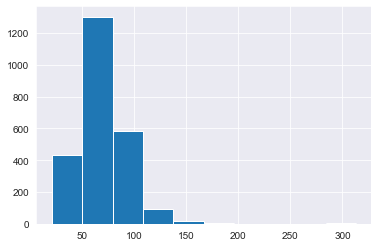

In [18]:
f_train.LotFrontage.hist()


1. [Cstacked-regressions-top-4-on-leaderboard][1] by **Serigne**  : have done very motivational data analysis explain here [Pandas Transformation][2]

He says "Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood**. 




[1]: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
[2]:https://pbpython.com/pandas_transform.html

In [19]:
# Count all Null index of LotFrontage against Each catagaory of neighborhood
f_train[f_train['LotFrontage'].isnull()==True]['Neighborhood'].value_counts()


NAmes      68
Gilbert    54
Sawyer     53
CollgCr    47
NWAmes     46
ClearCr    24
Mitchel    24
Crawfor    20
Somerst    20
SawyerW    19
NoRidge    17
Edwards    16
Timber     15
BrkSide    13
OldTown    10
Blmngtn     8
Veenker     8
IDOTRR      6
StoneBr     5
MeadowV     4
SWISU       4
NridgHt     3
NPkVill     2
Name: Neighborhood, dtype: int64

In [20]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
f_train["LotFrontage"] = f_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

    Now in next line i am going to find the most related features to
    LotFrontage 
    

In [21]:
# Try using lot_train and train and see the difference
corr_matrix = f_train.corr()
corr_matrix["LotFrontage"].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.438699
LotArea          0.387612
GrLivArea        0.363344
GarageArea       0.352716
TotalBsmtSF      0.345796
TotRmsAbvGrd     0.328974
GarageCars       0.301518
Fireplaces       0.246510
MasVnrArea       0.221313
BedroomAbvGr     0.220571
BsmtFinSF1       0.216259
OverallQual      0.210123
FullBath         0.169697
OpenPorchSF      0.157999
PoolArea         0.155863
YearBuilt        0.123801
WoodDeckSF       0.119778
BsmtFullBath     0.115003
BsmtUnfSF        0.100958
YearRemodAdd     0.087066
GarageYrBlt      0.075048
ScreenPorch      0.073681
BsmtFinSF2       0.056204
HalfBath         0.043388
MiscVal          0.038065
3SsnPorch        0.029015
2ndFlrSF         0.027077
MoSold           0.007365
EnclosedPorch    0.006767
KitchenAbvGr     0.002902
LowQualFinSF     0.002888
YrSold          -0.008826
BsmtHalfBath    -0.011466
OverallCond     -0.059130
MSSubClass      -0.400908
Name: LotFrontage, dtype: float64

In [22]:
flotnull_status(f_train)

2


MasVnrArea      23
GarageYrBlt    159
dtype: int64

#### MasVnrArea and MasVnrTyp

    Masonry veneer area in square feet
    NA most likely means no masonry veneer for these houses. We can 
    fill 0 for the area and None for the type.

In [23]:
print(f_train.MasVnrArea.isnull().sum())
print(f_train.MasVnrType.isnull().sum())

23
24


In [24]:
# all_data.MasVnrArea.unique()

In [25]:
# Mtrain[Mtrain['MasVnrType'].isnull()==True][['MasVnrType','MasVnrArea']]

In [26]:
#if there is no Masonar area mean 0 so we can set it to 0
f_train['MasVnrType']=f_train['MasVnrType'].fillna("None")
f_train['MasVnrArea']=f_train['MasVnrArea'].fillna(0)

In [27]:
flotnull_status(f_train)

1


GarageYrBlt    159
dtype: int64

#### GarageYrBlt 

In [28]:
flotnull_status(f_train)

1


GarageYrBlt    159
dtype: int64


    GarageYrBlt(Year garage was built) is also related on other features
    of Garage like e.g 
    - Garage Type : Garage location
    - GarageYrBlt : Year garage was built
    - GarageFinish: Interior finish of the garage
    - GarageCars  : Size of garage in car capacity
    - GarageArea  : Size of garage in square feet
    - GarageQual  : Garage quality 
    - GarageCond  : Garage condition
    these all features are related to each other becouse when there is 
    no Garage in house then all corresponding feature should have
    missing values at the same record for the houses having no Garage
    

In [29]:
# what is the last and 1st year of this datat
f_train.GarageYrBlt.min(),f_train.GarageYrBlt.max()

(1895.0, 2207.0)

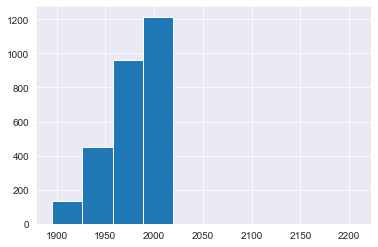

In [30]:
#what is historgram
f_train.GarageYrBlt.hist()

    You can see in next line, the number of missing values are mostly
    the same which mean other feature are meaningless if there is no
    Garage, this is why number of missing values are same in all  
    given features about Garage but there is one problem here 
    GarageCars should i also have 81 missing values. Let's find out 
    what is the reason.

In [31]:
print("GarageYrBlt  Missing values",f_train.GarageYrBlt.isnull().sum())
print("GarageType   Missing values",f_train.GarageType.isnull().sum())
print("GarageCars   Missing values",f_train.GarageCars.isnull().sum())
print("GarageCond   Missing values",f_train.GarageCond.isnull().sum())
print("GarageArea   Missing values",f_train.GarageArea.isnull().sum())
print("GarageQual   Missing values",f_train.GarageQual.isnull().sum())
print("GarageFinish   Missing values",f_train.GarageFinish.isnull().sum())









GarageYrBlt  Missing values 159
GarageType   Missing values 157
GarageCars   Missing values 1
GarageCond   Missing values 159
GarageArea   Missing values 1
GarageQual   Missing values 159
GarageFinish   Missing values 159


    what are different catagories of each feature?

In [32]:

print("GarageYrBlt  : ",f_train.GarageYrBlt.unique())
print("GarageType   : ",f_train.GarageType.unique())
print("GarageCars : ",f_train.GarageCars.unique())
print("GarageCond   : ",f_train.GarageCond.unique())
print("GarageArea   : ",f_train.GarageArea.unique())
print("GarageQual   : ",f_train.GarageQual.unique())
print("GarageFinish   : ",f_train.GarageFinish.unique())



GarageYrBlt  :  [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896. 1895. 2207. 1943. 1919.]
GarageType   :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageCars :  [ 2.  3.  1.  0.  4.  5. nan]
GarageCond   :  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageArea   :  [ 548.  460.  608.  642.  836.  480.  636.  484.  468.  205.  384.  736.
  352.  840.  576.  516.  294.  853.  280.  534.  572.  270.  890.  772.
  319.  240.  250.

    Once we find out if the indexes of missing values in all related
    feature are same then it will be easy to find Reason why 
    GarageCars have no missing values. Now i will check if the number 
    of missing value indexes are same at other feature related to 
    GarageYrBlt or not
    

In [33]:
f_train[f_train['GarageType'].isnull()==True][
    ['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCars','GarageCond']
    
]



GarageYrBlt GarageType GarageFinish GarageQual  GarageCars GarageCond
39            NaN        NaN          NaN        NaN         0.0        NaN
48            NaN        NaN          NaN        NaN         0.0        NaN
78            NaN        NaN          NaN        NaN         0.0        NaN
88            NaN        NaN          NaN        NaN         0.0        NaN
89            NaN        NaN          NaN        NaN         0.0        NaN
...           ...        ...          ...        ...         ...        ...
2893          NaN        NaN          NaN        NaN         0.0        NaN
2909          NaN        NaN          NaN        NaN         0.0        NaN
2913          NaN        NaN          NaN        NaN         0.0        NaN
2914          NaN        NaN          NaN        NaN         0.0        NaN
2917          NaN        NaN          NaN        NaN         0.0        NaN

[157 rows x 6 columns]

**Conclusion**

    we have Found, the number of missing values in GarageCars is zero
    because here they have used '0' instead of NaN and command 
    isnull().sum() will not able to count for zero. 
    
    Morever, if the number of car per house is zero than other feature
    is quite reseanable to be Nan

Now i will replace Nan to None for catagorical data and zero for 
    numerical data

###### zero for numerical data

In [34]:
f_train['GarageYrBlt']=f_train['GarageYrBlt'].fillna(0)
f_train['GarageArea']=f_train['GarageArea'].fillna(0)
f_train['GarageCars']=f_train['GarageCars'].fillna(0)


In [35]:
f_train['GarageFinish']=f_train['GarageFinish'].fillna("None")
f_train['GarageQual']=f_train['GarageQual'].fillna("None")

f_train['GarageCond']=f_train['GarageCond'].fillna("None")

f_train['GarageType']=f_train['GarageType'].fillna("None")



    Put back data into Train dataFrame

In [36]:
flotnull_status(f_train)

0


Series([], dtype: int64)

In [37]:
all_data=f_train

###### 2.2 Catagorical Missing values

In [38]:
cat_train=all_data.copy()

In [39]:
flotnull_status(cat_train),"==================",cat_miss_value_status(cat_train)

cat_train

0
18


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
3            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
4            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
2914         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2915         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2916         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2917         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
2918         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0       2    2008        WD         Normal  
1            NaN       0       5    2007        WD         Normal  
2            NaN       0       9    2008        WD         Normal  
3            NaN       0       2    2006        WD        Abnorml  
4            NaN       0      12    2008        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
2914         NaN       0       6    2006        WD         Normal  
2915         NaN       0       4    2006        WD        Abnorml  
2916         NaN       0       9    2006        WD        Abnorml  
2917        Shed     700       7    2006        WD         Normal  
2918         NaN       0      11    2006        WD         Normal  

[2919 rows x 79 columns]

###### Basment

    Before we guess what should we replace for Nan lets just see what 
    other related feature give us information for their mssing values.
    - BsmtFinSF1   : Type 1 finished square feet
    - BsmtFinSF2   : Type 2 finished square feet
    - TotalBsmtSF  : Total square feet of basement area
    - BsmtFullBath : Basement full bathrooms
    - BsmtHalfBath : Basement half bathrooms
    - BsmtUnfSF    : Unfinished square feet of basement area
    
    other related catagorical feature to Basement are 
    
    - BsmtQual     : Height of the basement
    - BsmtCond     : General condition of the basement
    - BsmtExposure : Walkout or garden level basement walls
    - BsmtFinType1: Quality of basement finished area
    - BsmtFinType2: Quality of second finished area (if present)
    
    

In [40]:
print("BsmtQual      : ",cat_train.BsmtQual.unique())
print("BsmtCond      : ",cat_train.BsmtCond.unique())
print("BsmtExposure  : ",cat_train.BsmtExposure.unique())
print("BsmtFinType1  : ",cat_train.BsmtFinType1.unique())
print("BsmtFinType2  : ",cat_train.BsmtFinType2.unique())



BsmtQual      :  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond      :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1  :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2  :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


    BsmtFullBath is having highest missing values. i will index all
    other related feature using BsmtFullBath indexes of missing values

In [41]:
cat_train[cat_train['BsmtQual'].isnull()==True][
    ['BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
      
    ]  ]


BsmtUnfSF  TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtFullBath  \
17          0.0          0.0         0.0         0.0           0.0   
39          0.0          0.0         0.0         0.0           0.0   
90          0.0          0.0         0.0         0.0           0.0   
102         0.0          0.0         0.0         0.0           0.0   
156         0.0          0.0         0.0         0.0           0.0   
...         ...          ...         ...         ...           ...   
2803        0.0          0.0         0.0         0.0           0.0   
2804        0.0          0.0         0.0         0.0           0.0   
2824        0.0          0.0         0.0         0.0           0.0   
2891        0.0          0.0         0.0         0.0           0.0   
2904        0.0          0.0         0.0         0.0           0.0   

      BsmtHalfBath  BsmtUnfSF BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
17             0.0        0.0      NaN      NaN          NaN          NaN   
39             0.0        0.0      NaN      NaN          NaN          NaN   
90             0.0        0.0      NaN      NaN          NaN          NaN   
102            0.0        0.0      NaN      NaN          NaN          NaN   
156            0.0        0.0      NaN      NaN          NaN          NaN   
...            ...        ...      ...      ...          ...          ...   
2803           0.0        0.0      NaN      NaN          NaN          NaN   
2804           0.0        0.0      NaN      NaN          NaN          NaN   
2824           0.0        0.0      NaN      NaN          NaN          NaN   
2891           0.0        0.0      NaN      NaN          NaN          NaN   
2904           0.0        0.0      NaN      NaN          NaN          NaN   

     BsmtFinType2  
17            NaN  
39            NaN  
90            NaN  
102           NaN  
156           NaN  
...           ...  
2803          NaN  
2804          NaN  
2824          NaN  
2891          NaN  
2904          NaN  

[81 rows x 12 columns]

    Hence we conclulded because if House have no basement. Hence,House
    having no Basement should have all these feature equal to zero
  

In [42]:
cat_train['BsmtFinSF1']=cat_train['BsmtFinSF1'].fillna(0)
cat_train['BsmtUnfSF']=cat_train['BsmtUnfSF'].fillna(0)
cat_train['TotalBsmtSF']=cat_train['BsmtFinSF1'].fillna(0)
cat_train['BsmtFinSF1']=cat_train['BsmtFinSF1'].fillna(0)
cat_train['BsmtFinSF2']=cat_train['BsmtFinSF2'].fillna(0)
cat_train['BsmtFullBath']=cat_train['BsmtFullBath'].fillna(0)
cat_train['BsmtHalfBath']=cat_train['BsmtHalfBath'].fillna(0)

In [43]:
# cat_train['BsmtQual']=cat_train['BsmtQual'].fillna("None")
cat_train['BsmtCond']=cat_train['BsmtCond'].fillna("None")
cat_train['BsmtExposure']=cat_train['BsmtExposure'].fillna("None")
cat_train['BsmtFinType1']=cat_train['BsmtFinType1'].fillna("None")
cat_train['BsmtFinType2']=cat_train['BsmtFinType2'].fillna("None")

In [44]:
# all_data=bs_train

In [45]:
cat_miss_value_status(cat_train)

14


MSZoning          4
Alley          2721
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtQual         81
Electrical        1
KitchenQual       1
Functional        2
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
SaleType          1
dtype: int64

**Alley**

    Gravel : mean small stones in stree not setup
    Pave   : mean flatten like rood 

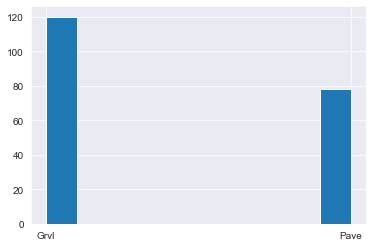

In [46]:
cat_train['Alley'].hist()

In [47]:
cat_train['Alley']=cat_train['Alley'].fillna("None")

In [48]:
cat_miss_value_status(cat_train)

13


MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtQual         81
Electrical        1
KitchenQual       1
Functional        2
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
SaleType          1
dtype: int64

**FireplaceQu**

    One Reason for having Nan here in this feature mean 
    they have no Fireplace in house

In [49]:
cat_train['FireplaceQu']=cat_train['FireplaceQu'].fillna("None")

In [50]:
cat_miss_value_status(cat_train)

12


MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtQual         81
Electrical        1
KitchenQual       1
Functional        2
PoolQC         2909
Fence          2348
MiscFeature    2814
SaleType          1
dtype: int64

**PoolQC**

    it also make sense the majority of people maybe not having 
    any pool in houses

In [51]:
cat_train['PoolQC']=cat_train['PoolQC'].fillna("None")

In [52]:
cat_miss_value_status(cat_train)

11


MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtQual         81
Electrical        1
KitchenQual       1
Functional        2
Fence          2348
MiscFeature    2814
SaleType          1
dtype: int64

**Fence**

    Mojaroty of poeple might have no fence to houses

In [53]:
cat_train['Fence']=cat_train['Fence'].fillna("None")

In [54]:
cat_miss_value_status(cat_train)

10


MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtQual         81
Electrical        1
KitchenQual       1
Functional        2
MiscFeature    2814
SaleType          1
dtype: int64

**MiscFeature**

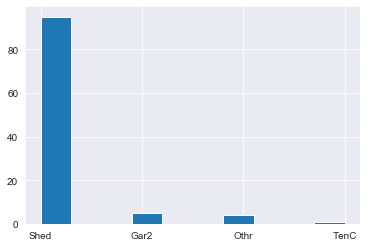

In [55]:
cat_train['MiscFeature'].hist()

In [56]:
cat_train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [57]:
cat_train['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

    it seems like most to have no Miscellaneous feature  

In [58]:
cat_train['MiscFeature']=cat_train['MiscFeature'].fillna("None")

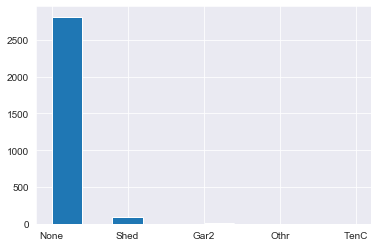

In [59]:
cat_train['MiscFeature'].hist()

In [60]:
cat_miss_value_status(cat_train)

9


MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtQual       81
Electrical      1
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

**Electrical**

In [61]:
cat_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

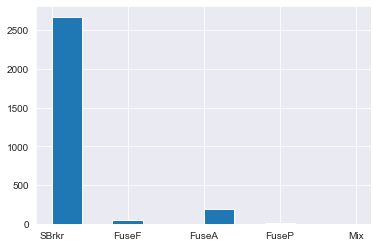

In [62]:
cat_train['Electrical'].hist()

    Every house must have electrical system, Hence we can replace 
    the Nan with Mode or mean or meadian

In [63]:
cat_train['Electrical']=cat_train['Electrical'].fillna(cat_train['Electrical'].mode()[0])



In [64]:
cat_miss_value_status(cat_train)

8


MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtQual       81
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

##### Exterior1st Ande Exterior2nd
**Discrption**:

    Exterior1st: Exterior covering on house
    Exterior2nd: covering on house (if more than one material)
**Discussion**
   
    Well we can not replace nane into None becouse covering 
    house from outside is essential. Again, It will be reasnable 
    to replace Nan with Mode, median or mean
     
     
     

In [65]:
print(cat_train['Exterior1st'].unique())

print(cat_train['Exterior2nd'].unique())



['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' nan]


In [66]:
print("Exterior1st  Missing values",cat_train.Exterior1st.isnull().sum())
print("Exterior2nd   Missing values",cat_train.Exterior2nd.isnull().sum())



Exterior1st  Missing values 1
Exterior2nd   Missing values 1


In [67]:
cat_train[cat_train['Exterior1st'].isnull()==True][
    ['Exterior1st','Exterior2nd']
    
]





Exterior1st Exterior2nd
2151         NaN         NaN

In [68]:
cat_train['Exterior1st'] = cat_train['Exterior1st'].fillna(cat_train['Exterior1st'].mode()[0])
cat_train['Exterior2nd'] = cat_train['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])



In [69]:
cat_miss_value_status(cat_train)

6


MSZoning        4
Utilities       2
BsmtQual       81
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

#### MSZoning
    MSZoning: Identifies the general zoning classification of the sale

***Discussion***

    Every house must have location in the mape. Hence, we can not 
    replace the missing value with none instead it will be batter
    to replace with Mode , median or mean

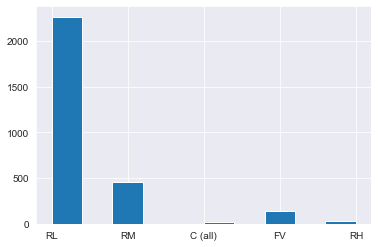

In [70]:
cat_train['MSZoning'].hist()

In [71]:
print("MSZoning Missing total : ",cat_train['MSZoning'].isnull().sum())

MSZoning Missing total :  4


In [72]:
print("MSZoning catogries ",cat_train['MSZoning'].unique())

MSZoning catogries  ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]


In [73]:
cat_train['MSZoning'] = cat_train['MSZoning'].fillna(cat_train['MSZoning'].mode()[0])



In [74]:
cat_miss_value_status(cat_train)

5


Utilities       2
BsmtQual       81
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

***Utilities***

    Type of utilities available.
    AllPub	All public Utilities (E,G,W,& S)	
    NoSewr	Electricity, Gas, and Water (Septic Tank)
    NoSeWa	Electricity and Gas Only
    ELO	    Electricity only
***Discussion***

    You can see here, the least option for any house utility is 
    ELO. Hence, we can not replace Utilities with None catagories
    becouse it will not replace real Scanario
    For this categorical feature all records are "AllPub", except
    for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is 
    in the training set, **this feature won't help in predictive 
    modelling**. We can then safely  remove it


In [75]:
print("Total Missing in Utitlies ",cat_train['Utilities'].isnull().sum())

Total Missing in Utitlies  2


In [76]:
print("Catagoris count","\n",cat_train['Utilities'].value_counts())

Catagoris count 
 AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [77]:
cat_train['Utilities'].mode()[0]



'AllPub'

In [78]:
cat_train = cat_train.drop(['Utilities'], axis=1)

In [79]:
cat_miss_value_status(cat_train)

4


BsmtQual       81
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

***KitchenQual***

    KitchenQual: Kitchen quality
    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    
***Discussion***

    Every house must have kitchen and if all of them are not having 
    same catagories and it is okay to replace it with mode, mean or
    median


 

In [80]:
print("KitchenQual Mising values: ",cat_train['KitchenQual'].isnull().sum())



KitchenQual Mising values:  1


In [81]:
cat_train['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [82]:
cat_train['KitchenQual'] = cat_train['KitchenQual'].fillna(cat_train['KitchenQual'].mode()[0])



In [83]:
cat_miss_value_status(cat_train)

3


BsmtQual      81
Functional     2
SaleType       1
dtype: int64

***Functional ***

    Home functionality -Assume typical unless deductions are warranted
    Typ	Typical Functionality
    Min1	Minor Deductions 1
    Min2	Minor Deductions 2
    Mod	    Moderate Deductions
    Maj1	Major Deductions 1
    Maj2	Major Deductions 2
    Sev	    Severely Damaged
    Sal	    Salvage only

***Discussion***
    
    Assume typical unless deductions are warranted.Hence we need to 
    replace Nan with type instead of None
    

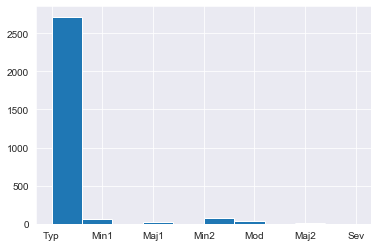

In [84]:
cat_train['Functional'].hist()

In [85]:
print("Functional Missing ",cat_train['Functional'].isnull().sum())

Functional Missing  2


In [86]:
cat_train['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [87]:
cat_train['Functional'] = cat_train['Functional'].fillna(cat_train['Functional'].mode()[0])




In [88]:
cat_miss_value_status(cat_train)

2


BsmtQual    81
SaleType     1
dtype: int64

***SaleType*** 

    SaleType: Type of sale
    WD 	    Warranty Deed - Conventional
    CWD	    Warranty Deed - Cash
    VWD	    Warranty Deed - VA Loan
    New	    Home just constructed and sold
    COD     Court Officer Deed/Estate
    Con     Contract 15% Down payment regular terms
    ConLw   Contract Low Down payment and low interest
    ConLI	Contract Low Interest
    ConLD	Contract Low Down
    Oth	    Other
    
***Discussion***
    
    Assume Other unless type of Sale is other option. Hence we need to 
    replace Nan with type instead of Other


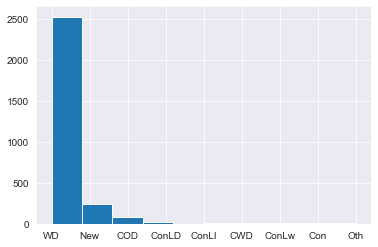

In [89]:
cat_train['SaleType'].hist()

In [90]:
print("Total missig : ",cat_train['SaleType'].isnull().sum())

Total missig :  1


In [91]:
cat_train['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [92]:
cat_train['SaleType'] = cat_train['SaleType'].fillna(cat_train['SaleType'].mode()[0])

In [93]:
cat_miss_value_status(cat_train)

1


BsmtQual    81
dtype: int64

In [94]:
all_data=cat_train

In [95]:
cat_miss_value_status(all_data)

1


BsmtQual    81
dtype: int64

In [96]:
flotnull_status(all_data)

0


Series([], dtype: int64)

In [97]:
integer_null_status(all_data)

0


Series([], dtype: int64)

**Adding one more important feature**

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [98]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']




# Finding and fixing Outliers

    In this section, i have worked on finding relationship between the target feature
    i.e "SalePrice" and other feature.
    After finding the relationship between the feature, i tried to find the outliers 
    in order to create relationship more stronger.
    There are many ways to remove outlier. Instead of dropout the record i do 
    replace the outlier with mean value, i don't have strong reason for this but i think
    it will better instead of droping out the record because of strange behavior.
    Droping out single record mean removing also other feature record for the same 
    record that is why, i consider droping out the record is not good idea.

    before we finding and fixing outlier, i think we should convert object data type to 
    number using Label Encoder
   

In [99]:
# from sklearn.preprocessing import LabelEncoder
# cols=all_data.dtypes[all_data.dtypes=='object'].index

# # process columns, apply LabelEncoder to categorical features
# for c in cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(all_data[c].values)) 
#     all_data[c] = lbl.transform(list(all_data[c].values))

# # shape        
# print('Shape all_data: {}'.format(all_data.shape))



    we have already merged our training and testing data set and drop "ID" and
    "SalePrice".Hence, we seprated the train dataset from all data set and put back 
    "ID" and "SalePrice" in new Dataframe as outlier_train.

In [100]:
outlr_train = all_data[:ntrain]

In [101]:
outlr_train['SalePrice']=y_train

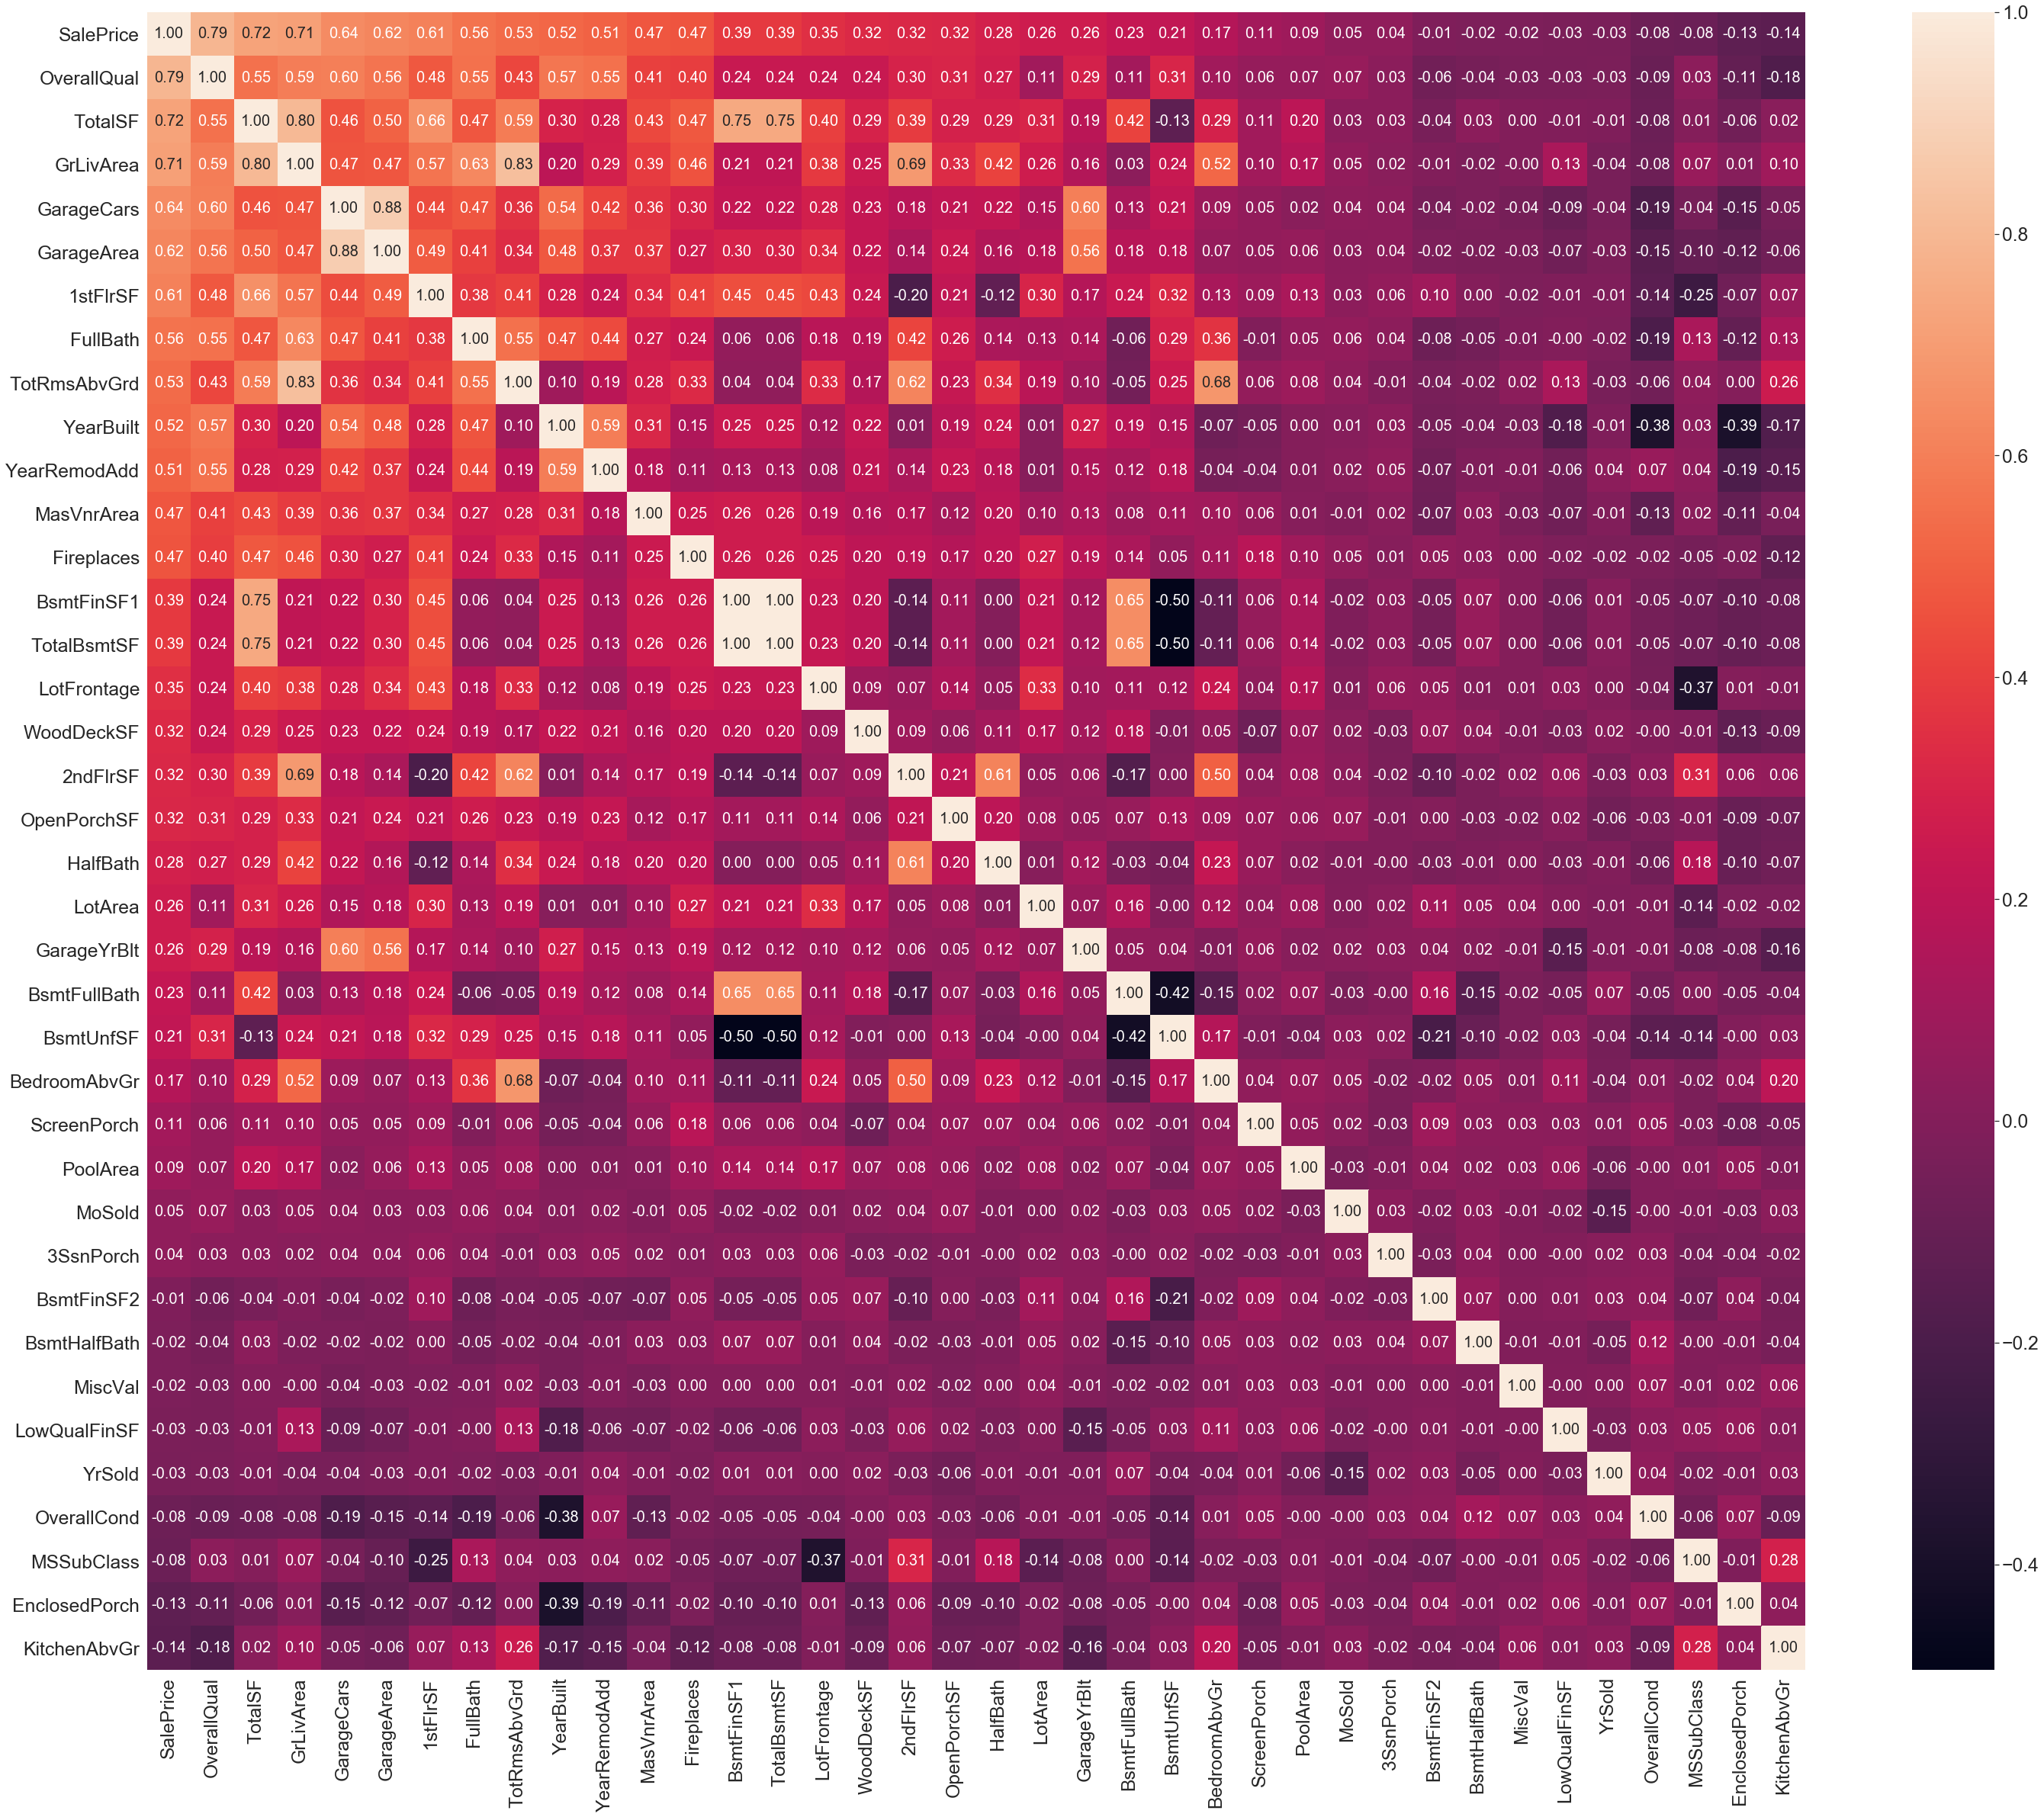

In [102]:

corrmat = outlr_train.corr()
k = 80#number of variables for heatmap

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(outlr_train[cols].values.T)
sns.set(font_scale=2.25)
plt.subplots(figsize=(50, 40))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

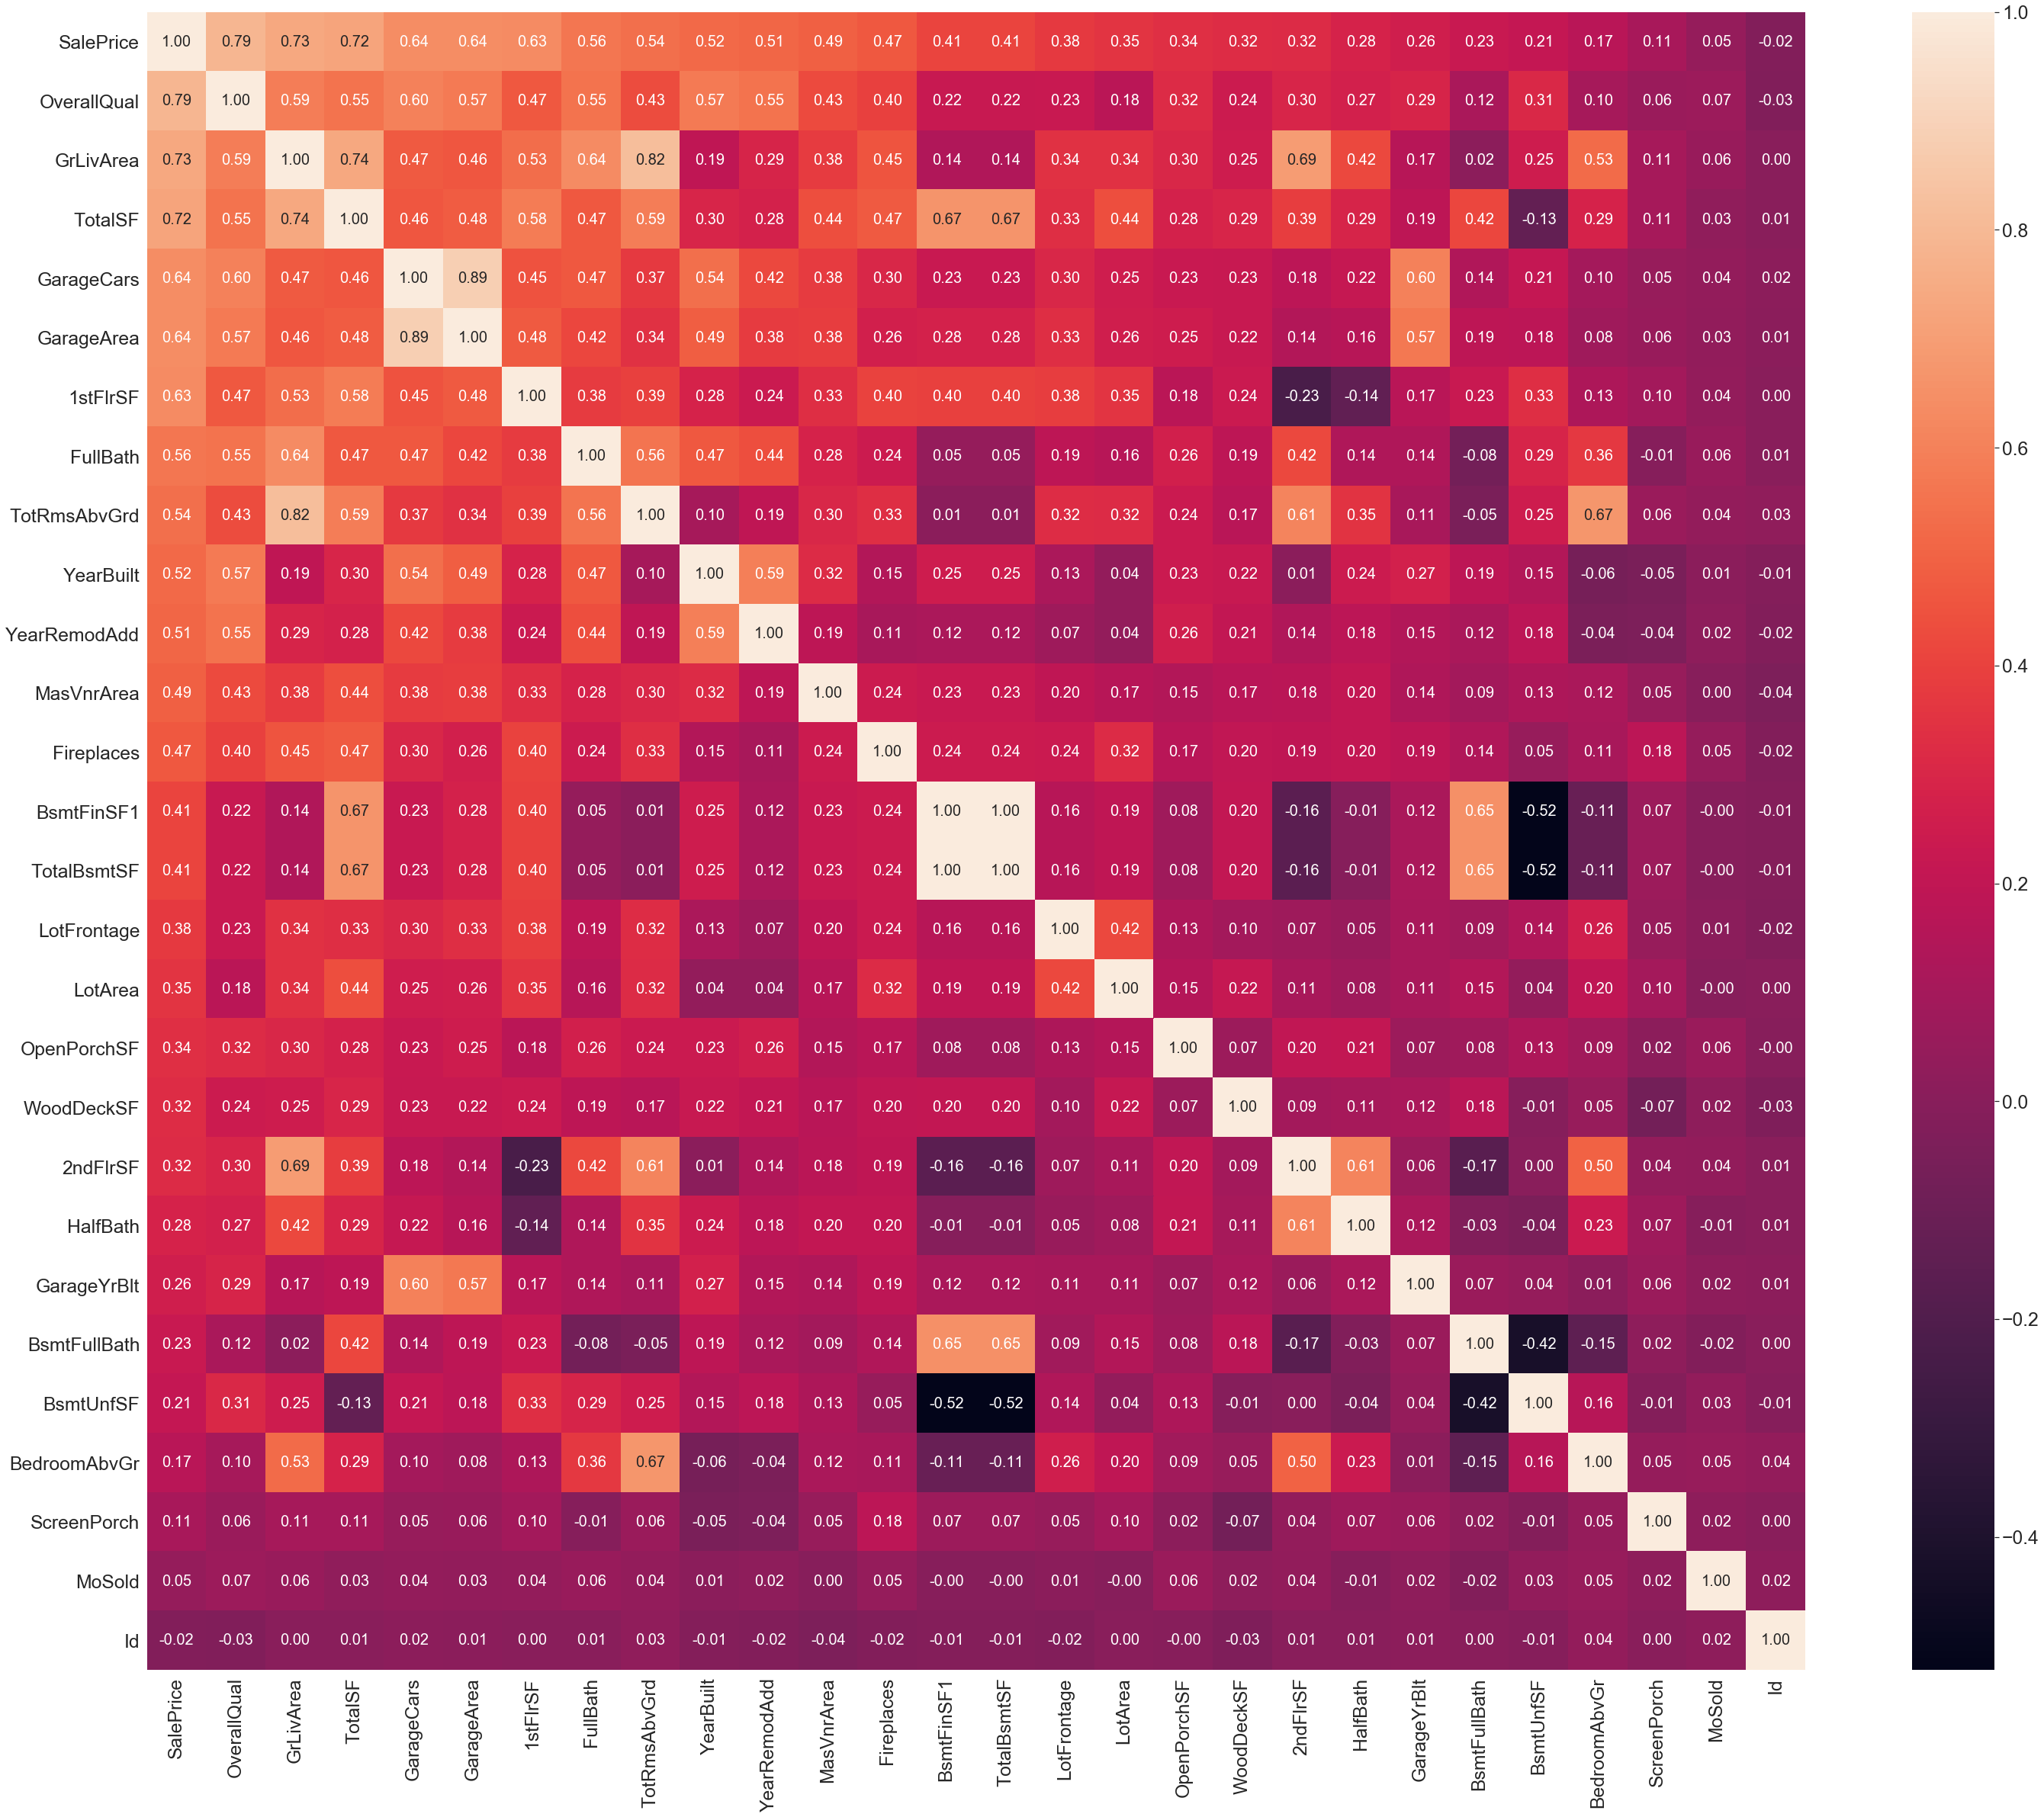

In [250]:

corrmat = outlr_train.corr()
k = 80#number of variables for heatmap

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(outlr_train[cols].values.T)
sns.set(font_scale=2.25)
plt.subplots(figsize=(50, 40))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [103]:
len(corrmat.nlargest(k, 'SalePrice')['SalePrice'].index)
feat_list=list(corrmat.nlargest(k, 'SalePrice')['SalePrice'].index)

    i am taking only +ve co relation with SalePrice and plot scatter

In [104]:
k = 80#number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(outlr_train[cols].values.T)


#scatterplot
corrmat.nlargest(k, 'SalePrice')['SalePrice']
nearest_list=list(corrmat.nlargest(k, 'SalePrice')['SalePrice'].index)

In [105]:
outlr_train['Id']=train_ID

In [106]:
def plot_Bivariate(option):
    option=nearest_list[option]
    print(option)
    # bivariate analysis saleprice/grlivarea
    var = option
    data = pd.concat([outlr_train['SalePrice'], outlr_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## 1.SalePrice vs OverallQual

    Above grade (ground) living area square feet
    OverallQual: Rates the overall material and finish of the house
    10	Very Excellent
    9	Excellent
    8	Very Good
    7	Good
    6	Above Average
    5	Average
    4	Below Average
    3	Fair
    2	Poor
    1	Very Poor

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


OverallQual


0.7909816005838047

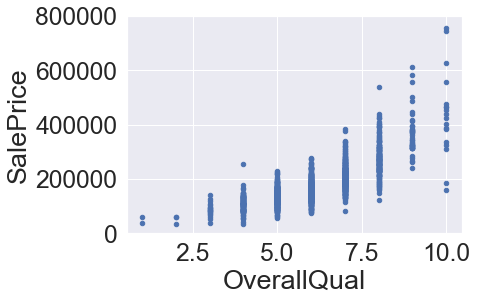

In [107]:

plot_Bivariate(1)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['OverallQual']

**Discussion** :
    
    SalePrice and OverallQual have very good relationship. According to scatter plot,
    the more it have the higher quality, the more it will have higher price.
    Outlier can't be seen here because data looks very normal
    

    ----------------------------------------------------------------------------------

## 2.SalePrice vs GrLiveArea:
    
    : Above ground living area square feet
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GrLivArea


0.7086244776126511

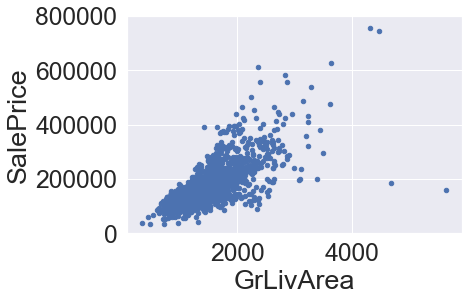

In [108]:
plot_Bivariate(3)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['GrLivArea']

In [109]:
#deleting points

outlr_train.sort_values(by = 'GrLivArea', ascending = False)[:1]['GrLivArea']

#taking GrLiveArea mean
gr_mean=np.mean(outlr_train.GrLivArea)
gr_mean
outlr_train['GrLivArea'][outlr_train['Id']==1299]=gr_mean
outlr_train['GrLivArea'][outlr_train['Id']==524]=gr_mean


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GrLivArea


0.7086244776126511

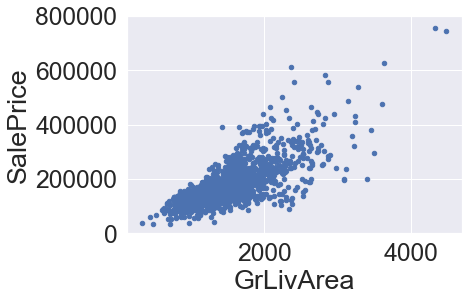

In [110]:
plot_Bivariate(3)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['GrLivArea']

**Discussion**:

    You can see, After removing 2 ambigius point, The relationship looks 
    linear.

## 3.SalePrice vs GarageArea

    GarageArea: Size of garage in square feet
    GarageCars: Size of garage in car capacity
    these both are looks same

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GarageArea
GarageArea 0.6234314389183598
GarageCars 0.640409197258349


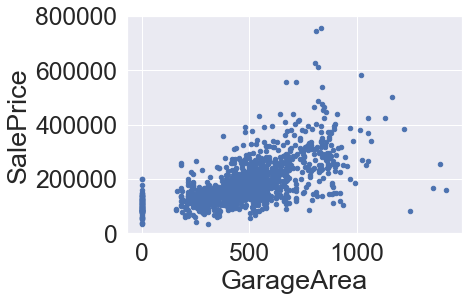

In [111]:
plot_Bivariate(5)
print('GarageArea',corrmat.nlargest(k, 'SalePrice')['SalePrice']['GarageArea'])
print('GarageCars',corrmat.nlargest(k, 'SalePrice')['SalePrice']['GarageCars'])

In [112]:
outlr_train.groupby(['SalePrice','GarageArea',]).filter(lambda x: 
(((x['SalePrice']<=260000 ).any() and (x['GarageArea']>=1100).any()))) .reset_index()[['Id','SalePrice','GarageArea']]


Id  SalePrice  GarageArea
0   582     253293      1390.0
1  1062      81000      1248.0
2  1191     168000      1356.0
3  1299     160000      1418.0

In [113]:
#takin mean of the data
gr_mean=np.mean(outlr_train.GarageArea)
gr_mean

472.9801369863014

In [114]:
## taking GrLiveArea mean

outlr_train['GarageArea'][outlr_train['Id']==582]=gr_mean
outlr_train['GarageArea'][outlr_train['Id']==1062]=gr_mean
outlr_train['GarageArea'][outlr_train['Id']==1191]=gr_mean
outlr_train['GarageArea'][outlr_train['Id']==1299]=gr_mean




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GarageArea


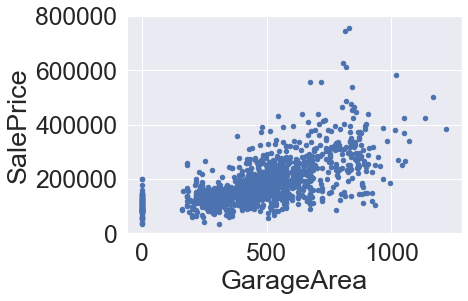

In [115]:
plot_Bivariate(5)

**Discussion**:

    You can see, After fixing 4 ambigius point, The relationship looks 
    linear.

    ----------------------------------------------------------------------------------

In [116]:
corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars',
       'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'TotalBsmtSF',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'GarageYrBlt', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond',
       'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

## 5.SalePrice vs TotalBsmtSF
    
        Total square feet of basement area
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TotalBsmtSF


0.38641980624215627

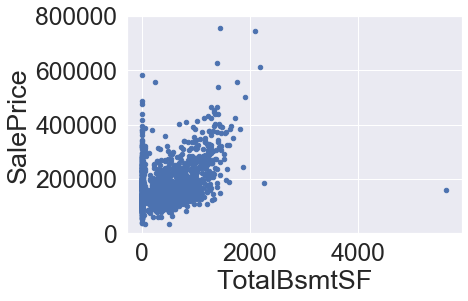

In [117]:
plot_Bivariate(14)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['TotalBsmtSF']

In [118]:
outlr_train.groupby(['SalePrice','TotalBsmtSF',]).filter(lambda x: 
(((x['SalePrice']<=200000 ).any() and (x['TotalBsmtSF']>=2000).any()))) .reset_index()[['Id','SalePrice','TotalBsmtSF']]




Id  SalePrice  TotalBsmtSF
0   524     184750       2260.0
1  1299     160000       5644.0

In [119]:
#takin mean of the data
gr_mean=np.mean(outlr_train['TotalBsmtSF'])
gr_mean

443.6397260273973

In [120]:
outlr_train['TotalBsmtSF'][outlr_train['Id']==524]=gr_mean #524
outlr_train['TotalBsmtSF'][outlr_train['Id']==1299]=gr_mean

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TotalBsmtSF


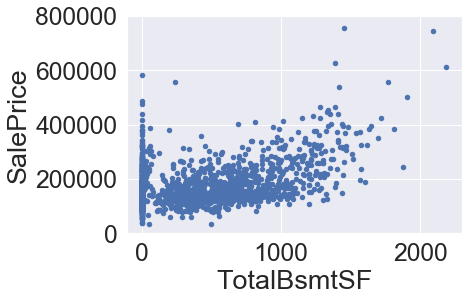

In [121]:
plot_Bivariate(14)

**Discussion**:

    You can see, After fixing 2 ambigius point, The relationship looks 
    better now .

    -----------------------------------------------------------------------------------

## 6.SalePrice vs 1stFlrSF
    1stFlrSF: First Floor square feet
 
    2ndFlrSF: Second floor square feet
    
    both feature looks same 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


1stFlrSF
1stFlrSF 0.6058521846919166
2ndFlrSF 0.31933380283206614


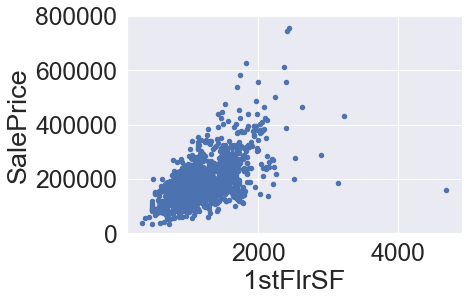

In [122]:
plot_Bivariate(6)
print('1stFlrSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['1stFlrSF'])
print('2ndFlrSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['2ndFlrSF'])

In [123]:
outlr_train.groupby(['SalePrice','1stFlrSF',]).filter(lambda x: 
(((x['SalePrice']<=200000).any() and (x['1stFlrSF']>=2500).any()))) .reset_index()[['Id','SalePrice','1stFlrSF']]


Id  SalePrice  1stFlrSF
0   524     184750      3138
1  1299     160000      4692

In [124]:
#takin mean of the data
gr_mean=np.mean(outlr_train['1stFlrSF'])
gr_mean

1162.626712328767

In [125]:
outlr_train['1stFlrSF'][outlr_train['Id']==524]=gr_mean
outlr_train['1stFlrSF'][outlr_train['Id']==1299]=gr_mean


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


1stFlrSF


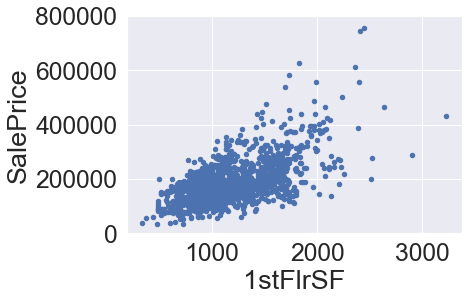

In [126]:
plot_Bivariate(6)

**Discussion**:

    You can see, After fixing 2 ambigius point, The relationship looks 
    better now .

    --------------------------------------------------------------------------------

## 7.SalePrice vs FullBath
    FullBath: Full bathrooms above grade

    HalfBath: Half baths above grade
    
    both feature looks same 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


FullBath


0.5606637627484452

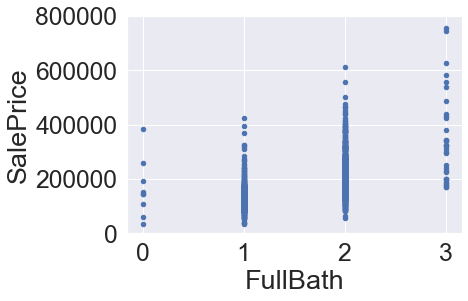

In [127]:
plot_Bivariate(7)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['FullBath']

**Discussion**:

    You can see, The relationship looks fine .

    --------------------------------------------------------------------------------

## 8.SalePrice vs TotRmsAbvGrd
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TotRmsAbvGrd


0.5337231555820238

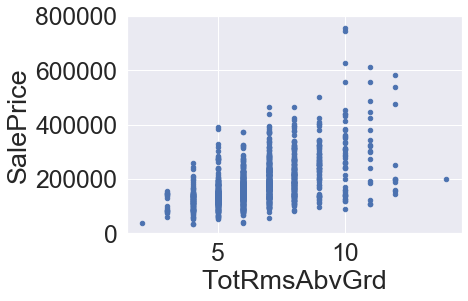

In [128]:
plot_Bivariate(8)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['TotRmsAbvGrd']

In [129]:
outlr_train.groupby(['SalePrice','TotRmsAbvGrd',]).filter(lambda x: 
(((x['SalePrice']==200000).any() and (x['TotRmsAbvGrd']>=13).any()))) .reset_index()[['Id','SalePrice','TotRmsAbvGrd']]





Id  SalePrice  TotRmsAbvGrd
0  636     200000            14

In [130]:
#takin mean of the data
gr_mean=np.mean(outlr_train['TotRmsAbvGrd'])
gr_mean

6.517808219178082

In [131]:
outlr_train['TotRmsAbvGrd'][outlr_train['Id']==636]=gr_mean

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TotRmsAbvGrd


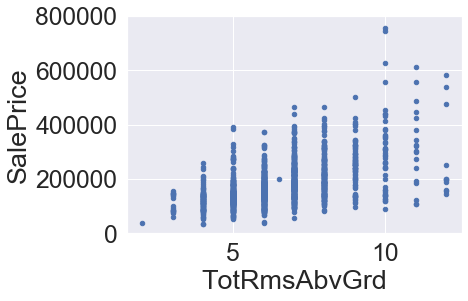

In [132]:
plot_Bivariate(8)

**Discussion**:

    You can see, After fixing 2 ambigius point, The relationship looks 
    better now .
    --------------------------------------------------------------------------------
    

## 9.SalePrice vs YearBuilt


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


YearBuilt


0.5228973328794967

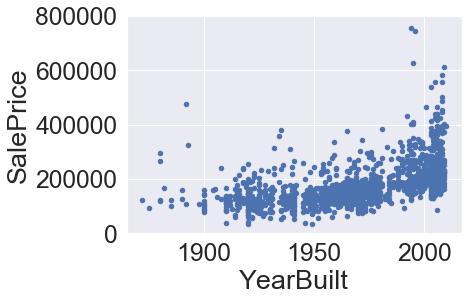

In [133]:
plot_Bivariate(9)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['YearBuilt']

**Discussion**:

    You can see, The relationship looks fine
    --------------------------------------------------------------------------------
    

## 10.SalePrice vs YearRemodAdd



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


YearRemodAdd


0.5071009671113867

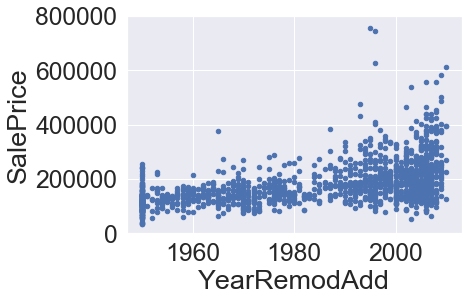

In [134]:
plot_Bivariate(10)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['YearRemodAdd']

**Discussion**:

    You can see, The relationship looks fine
    --------------------------------------------------------------------------------
    

## 11.SalePrice vs GarageYrBlt
        YearBuilt: Original construction date
        GarageYrBlt: Year garage was built



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GarageYrBlt
GarageYrBlt 0.2613664351029631
GarageYrBlt 0.5228973328794967


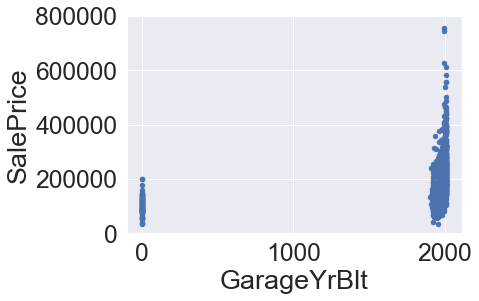

In [135]:
plot_Bivariate(21)
print('GarageYrBlt',corrmat.nlargest(k, 'SalePrice')['SalePrice']['GarageYrBlt'])
print('GarageYrBlt',corrmat.nlargest(k, 'SalePrice')['SalePrice']['YearBuilt'])

In [136]:
np.sort(outlr_train['GarageYrBlt'].unique())

array([   0., 1900., 1906., 1908., 1910., 1914., 1915., 1916., 1918.,
       1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928.,
       1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937.,
       1938., 1939., 1940., 1941., 1942., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.])

    As you can see here, there are many houses record where Garage built Year is not 
    mention in the dataset where they simply equal to 0 which is out of bound. I think
    it will be better to put all thoses 0 dataset records Garage build year to the 
    oldest year of dataset which is 1900.let's do this

In [137]:
outlr_train.groupby(['SalePrice','YearBuilt','GarageYrBlt',]).filter(lambda x: 
(((x['GarageYrBlt']==1900).any() ))) .reset_index()[['Id','SalePrice','YearBuilt','GarageYrBlt']]

Id  SalePrice  YearBuilt  GarageYrBlt
0  94     133900       1910       1900.0

In [138]:
outlr_train.GarageYrBlt[outlr_train['GarageYrBlt']==0]=1900

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GarageYrBlt


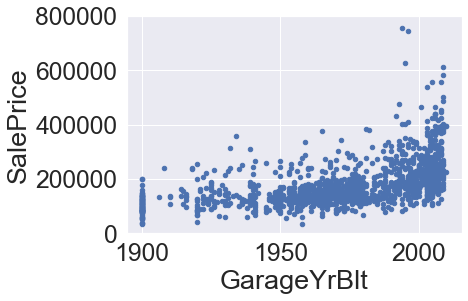

In [139]:
plot_Bivariate(21)

    As you can see, the relationship between Saleprice and Garage Year Built looks clear
    for now. GarageYrBlt feature might be part of Orignal Construction. lets se this

In [140]:
outlr_train.GarageYrBlt[outlr_train['GarageYrBlt']==1900]=0

In [141]:
outlr_train.GarageYrBlt[outlr_train['Id']==94]=1900

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GarageYrBlt


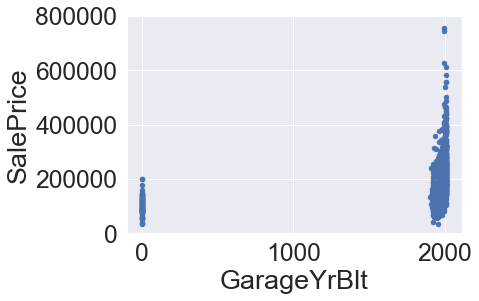

In [142]:
plot_Bivariate(21)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


YearBuilt


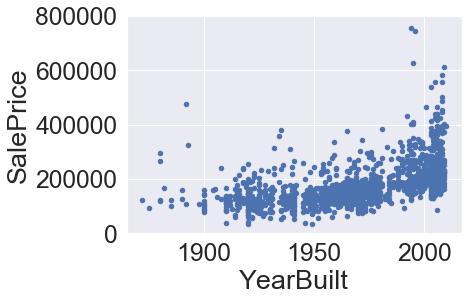

In [143]:
plot_Bivariate(9)

In [144]:
outlr_train.groupby(['SalePrice','YearBuilt','GarageYrBlt',]).filter(lambda x: 
(((x['YearBuilt']==1900).any() ))) .reset_index()[['Id','SalePrice','YearBuilt','GarageYrBlt']]

Id  SalePrice  YearBuilt  GarageYrBlt
0   243      79000       1900       1940.0
1   391     119000       1900       1978.0
2   489     160000       1900       1970.0
3   521     106250       1900          0.0
4   677      87000       1900       1920.0
5   704     140000       1900       1999.0
6   712     102776       1900       1964.0
7   922     145900       1900          0.0
8  1063      90000       1900       1945.0
9  1187      95000       1900       1920.0

**Discussion**:
    
    As you can see, First of all i replace 0 year with 1900 and make the scatter data
    clear. After that, I consider to remove GarageYrBlt feature because i thaught Garage
    of every house was built in begining of House construction year but when i put the 
    query to show me all the Garage build yar for house where construction year was 1900,
    But what i found was totaly different. so i think these are not same feature they 
    both can play important role while training the model.
    
    

    -------------------------------------------------------------------------------------

## 12.SalePrice vs MasVnrArea





'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


MasVnrArea


0.47261449900457725

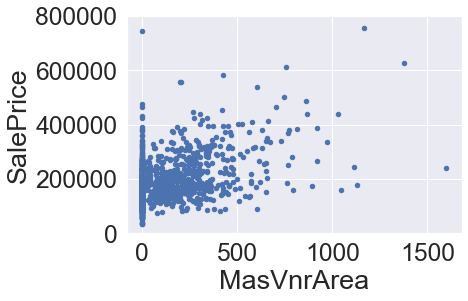

In [145]:
plot_Bivariate(11)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['MasVnrArea']

In [146]:
outlr_train.groupby(['SalePrice','MasVnrArea',]).filter(lambda x: 
(((x['SalePrice']<=250000).any() and (x['MasVnrArea']>=1000).any()))) .reset_index()[['Id','SalePrice','MasVnrArea']]



Id  SalePrice  MasVnrArea
0   71     244000      1115.0
1  116     176000      1129.0
2  298     239000      1600.0
3  809     159950      1047.0

In [147]:
#takin mean of the data
gr_mean=np.mean(outlr_train['MasVnrArea'])
gr_mean

103.11712328767123

In [148]:
outlr_train.MasVnrArea[outlr_train['Id']==71]=gr_mean
outlr_train.MasVnrArea[outlr_train['Id']==116]=gr_mean
outlr_train.MasVnrArea[outlr_train['Id']==298]=gr_mean
outlr_train.MasVnrArea[outlr_train['Id']==809]=gr_mean

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


MasVnrArea


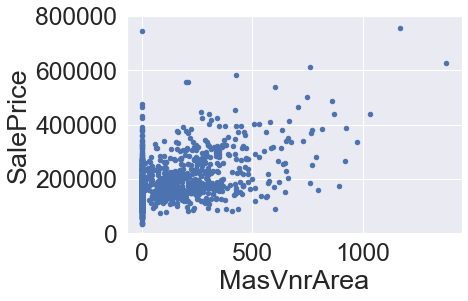

In [149]:
plot_Bivariate(11)

**Discussion**:

    You can see, The relationship looks fine
    --------------------------------------------------------------------------------
    

## 13.SalePrice vs Fireplaces






In [150]:
feat_list.index('Fireplaces')

12

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Fireplaces


0.4669288367515242

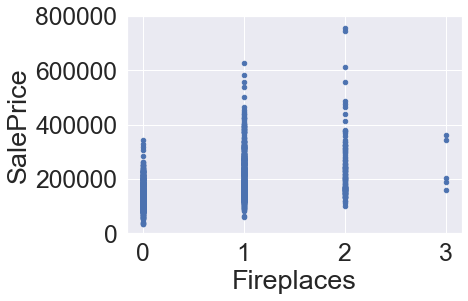

In [151]:
plot_Bivariate(12)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['Fireplaces']

**Discussion**:

    You can see, The relationship looks fine
    --------------------------------------------------------------------------------
    

## 14.SalePrice vs BsmtFinSF1







In [152]:
feat_list.index('BsmtFinSF1')

13

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtFinSF1


0.38641980624215627

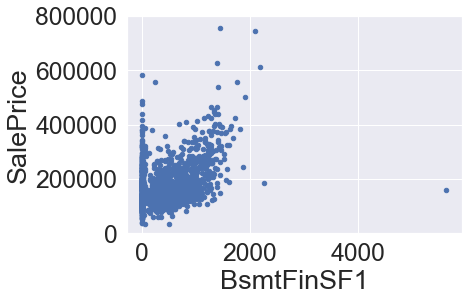

In [153]:
plot_Bivariate(13)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtFinSF1']

In [154]:
outlr_train.groupby(['SalePrice','BsmtFinSF1',]).filter(lambda x: 
(((x['SalePrice']<=200000).any() and (x['BsmtFinSF1']>=2000).any()))) .reset_index()[['Id','SalePrice','BsmtFinSF1']]


Id  SalePrice  BsmtFinSF1
0   524     184750      2260.0
1  1299     160000      5644.0

In [155]:
#takin mean of the data
gr_mean=np.mean(outlr_train['BsmtFinSF1'])
gr_mean

443.6397260273973

In [156]:
outlr_train.BsmtFinSF1[outlr_train['Id']==1299]=gr_mean
outlr_train.BsmtFinSF1[outlr_train['Id']==524]=gr_mean

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtFinSF1


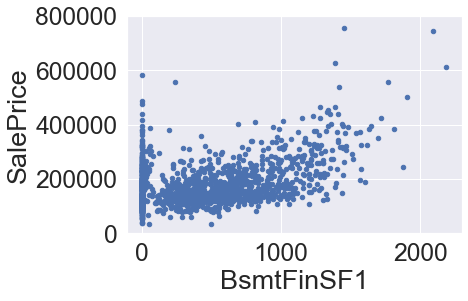

In [157]:
plot_Bivariate(13)

**Discussion**:

    You can see, After fixing 2 ambigius point, The relationship looks 
    better now .
    --------------------------------------------------------------------------------
    

## 15.SalePrice vs LotFrontage








In [158]:
feat_list.index('LotFrontage')

15

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LotFrontage


0.34780568410988716

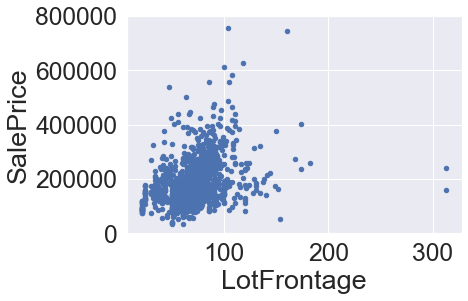

In [159]:
plot_Bivariate(15)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['LotFrontage']

In [160]:
outlr_train.groupby(['SalePrice','LotFrontage',]).filter(lambda x: 
(((x['SalePrice']<=250000).any() and (x['LotFrontage']>=300).any()))) .reset_index()[['Id','SalePrice','LotFrontage']]









Id  SalePrice  LotFrontage
0   935     242000        313.0
1  1299     160000        313.0

In [161]:
#takin mean of the data
gr_mean=np.mean(outlr_train['LotFrontage'])
gr_mean

70.1763698630137

In [162]:
outlr_train['LotFrontage'][outlr_train['Id']==935]=gr_mean
outlr_train['LotFrontage'][outlr_train['Id']==1299]=gr_mean

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LotFrontage


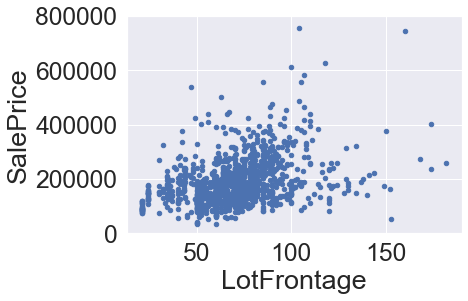

In [163]:
plot_Bivariate(15)

**Discussion**:

    You can see, After fixing 2 ambigius point, The relationship looks 
    better now .
    --------------------------------------------------------------------------------
    

## 17 Saleprice vs WoodDeckSF

    WoodDeckSF: Wood deck area in square feet

In [164]:
feat_list.index('WoodDeckSF')

16

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


WoodDeckSF


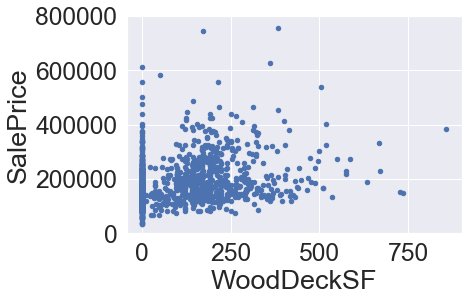

In [165]:
plot_Bivariate(16)

**Discussion**:

    You can see, The relationship looks fine
    --------------------------------------------------------------------------------
    

## 17 Saleprice vs 2ndFlrSF:
    1stFlrSF: First Floor square feet
 
    2ndFlrSF: Second floor square feet

In [166]:
feat_list.index('2ndFlrSF')

17

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


2ndFlrSF
1stFlrSF 0.6058521846919166
2ndFlrSF 0.31933380283206614


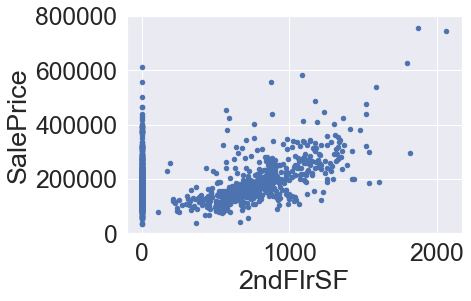

In [167]:
plot_Bivariate(17)
print('1stFlrSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['1stFlrSF'])
print('2ndFlrSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['2ndFlrSF'])

**Discussion**:
    
    both feature looks same and have good relationship with saleprice. Let it as it is.
    
    -------------------------------------------------------------------------------------    
    

## 18 Saleprice vs OpenPorchSF:
    OpenPorchSF: Open porch area in square feet

    EnclosedPorch: Enclosed porch area in square feet

In [168]:
feat_list.index('OpenPorchSF')

18

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


OpenPorchSF
OpenPorchSF 0.31585622711605577
EnclosedPorch -0.12857795792595636


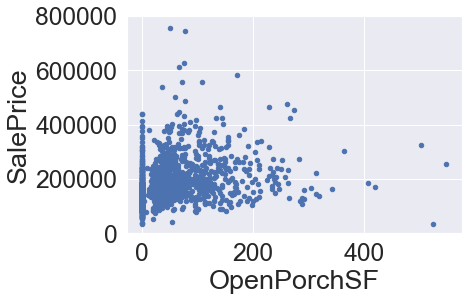

In [169]:
plot_Bivariate(18)
print('OpenPorchSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['OpenPorchSF'])
print('EnclosedPorch',corrmat.nlargest(k, 'SalePrice')['SalePrice']['EnclosedPorch'])

In [170]:
outlr_train.groupby(['SalePrice','OpenPorchSF']).filter(lambda x: 
(((x['SalePrice']<=400000).any() and (x['OpenPorchSF']>=400).any()))) .reset_index()[['Id','SalePrice','OpenPorchSF']]



Id  SalePrice  OpenPorchSF
0   496      34900          523
1   524     184750          406
2   584     325000          502
3   855     170000          418
4  1329     256000          547

In [171]:
#takin mean of the data
gr_mean=np.mean(outlr_train['OpenPorchSF'])
gr_mean

46.66027397260274

In [172]:
outlr_train['OpenPorchSF'][outlr_train['Id']==496]=gr_mean
outlr_train['OpenPorchSF'][outlr_train['Id']==524]=gr_mean
outlr_train['OpenPorchSF'][outlr_train['Id']==855]=gr_mean
outlr_train['OpenPorchSF'][outlr_train['Id']==584]=gr_mean
outlr_train['OpenPorchSF'][outlr_train['Id']==1329]=gr_mean





'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


OpenPorchSF


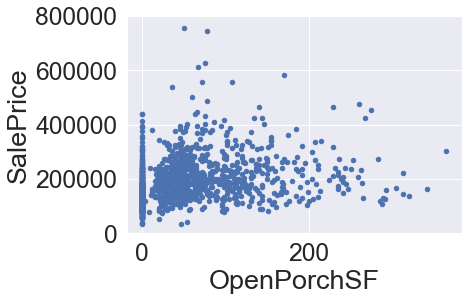

In [173]:
plot_Bivariate(18)

**Discussion**:
    
     You can see, this feature have strong relationship (0.31585) with saleprice
     than closePorchSF.
     we also have considered some data points and make it equal to mean.
     
     -------------------------------------------------------------------------------------
    
    
    

## 19 Saleprice vs HalfBath:

    FullBath: Full bathrooms above grade

    HalfBath: Half baths above grade


In [174]:
feat_list.index('HalfBath')

19

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


HalfBath
LotArea 0.2841076755947784
FullBath 0.5606637627484452


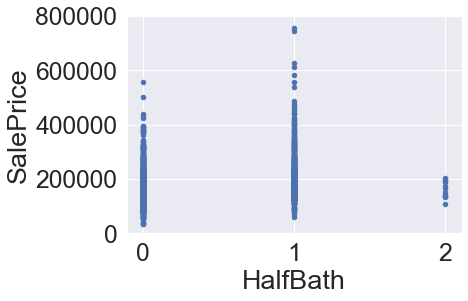

In [175]:
plot_Bivariate(19)
print('LotArea',corrmat.nlargest(k, 'SalePrice')['SalePrice']['HalfBath'])
print('FullBath',corrmat.nlargest(k, 'SalePrice')['SalePrice']['FullBath'])

In [176]:
outlr_train['HalfBath'].unique()

array([1, 0, 2])

In [177]:
outlr_train['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [178]:
outlr_train['FullBath'].unique()

array([2, 1, 3, 0])

In [179]:
outlr_train['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

**Discussion**:
    
    both feature looks same and have good relationship with saleprice. Let it as it is.
    
    
    

## 20 Saleprice vs LotArea:
    
       LotArea: Lot size in square feet
    

In [180]:
feat_list.index('LotArea')

20

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LotArea
LotArea 0.2638433538714063


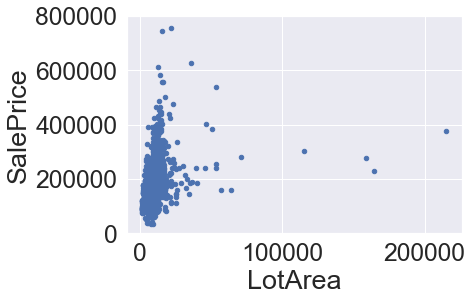

In [181]:
plot_Bivariate(20)
print('LotArea',corrmat.nlargest(k, 'SalePrice')['SalePrice']['LotArea'])


    you can see data scattering, where most of the data is plotted in range between
    0 and 100000, on other side, few number of points are scattered in area greater 
    than 100000. let's check this unusiual behavior with most related feature to LotARea

In [182]:
outlr_train.groupby(['SalePrice','LotArea']).filter(lambda x: 
(((x['SalePrice']<=400000).any() and (x['LotArea']>=100000).any()))) .reset_index()[['Id','SalePrice','LotArea','LotFrontage','1stFlrSF']]


Id  SalePrice  LotArea  LotFrontage  1stFlrSF
0  250     277000   159000         80.5    1444.0
1  314     375000   215245        150.0    2036.0
2  336     228950   164660         82.0    1619.0
3  707     302000   115149         80.5    1824.0

In [183]:
# Try using lot_train and train and see the difference
corr_matrix = f_train.corr()
corr_matrix["LotArea"].sort_values(ascending=False)[:4]

LotArea        1.000000
LotFrontage    0.387612
1stFlrSF       0.332460
GrLivArea      0.284519
Name: LotArea, dtype: float64

In [184]:
outlr_train.groupby(['SalePrice','LotArea']).filter(lambda x: 
(((x['SalePrice']<=400000).any() and (x['LotArea']<=100000).any()))) .reset_index()[['Id','SalePrice','LotArea','LotFrontage','1stFlrSF']]



Id  SalePrice  LotArea  LotFrontage  1stFlrSF
0        1     208500     8450         65.0     856.0
1        2     181500     9600         80.0    1262.0
2        3     223500    11250         68.0     920.0
3        4     140000     9550         60.0     961.0
4        5     250000    14260         84.0    1145.0
...    ...        ...      ...          ...       ...
1423  1456     175000     7917         62.0     953.0
1424  1457     210000    13175         85.0    2073.0
1425  1458     266500     9042         66.0    1188.0
1426  1459     142125     9717         68.0    1078.0
1427  1460     147500     9937         75.0    1256.0

[1428 rows x 5 columns]

**Discussion**:
    
    Sometime it can be possible to have strange behavior in your data and you can find
    the reason for this in most related feature. Hence, I tried to find
    any clue for this strange behavior where i find out the most of the value of 
    related feature for both normal and not normal are mostly same, In this case 
    batter solution is to replace this data with mean, mode or median.
    
    
    

In [185]:
#takin mean of the data
gr_mean=np.mean(outlr_train['LotArea'])
gr_mean

10516.828082191782

In [186]:
outlr_train['LotArea'][outlr_train['Id']==250]=gr_mean
outlr_train['LotArea'][outlr_train['Id']==314]=gr_mean
outlr_train['LotArea'][outlr_train['Id']==336]=gr_mean
outlr_train['LotArea'][outlr_train['Id']==707]=gr_mean



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LotArea


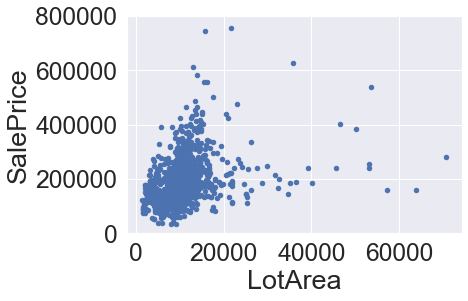

In [187]:
plot_Bivariate(20)

    -------------------------------------------------------------------------------------

## Saleprice vs BsmtFullBath

    BsmtFullBath: Basement full bathrooms

    BsmtHalfBath: Basement half bathrooms

    

In [188]:
feat_list.index('BsmtFullBath')

22

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtFullBath
BsmtHalfBath -0.016844154297359294
BsmtFullBath 0.22712223313149718


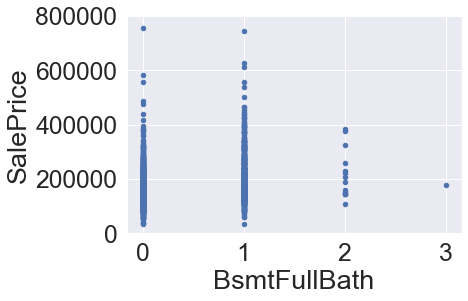

In [189]:
plot_Bivariate(22)
print('BsmtHalfBath',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtHalfBath'])
print('BsmtFullBath',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtFullBath'])

In [190]:
outlr_train['BsmtFullBath'].value_counts()

0.0    856
1.0    588
2.0     15
3.0      1
Name: BsmtFullBath, dtype: int64

In [191]:
outlr_train['BsmtFullBath'].unique()

array([1., 0., 2., 3.])

**Discussion**:

    You can see, the relationship between the BsmtFullBath and saleprice seems to me
    normal but considering only single record outliers as you can see on catagory 3.
    lets fix this outlier and take it to mean that's it

    

In [192]:
outlr_train.groupby(['SalePrice','BsmtFullBath']).filter(lambda x: 
((((x['BsmtFullBath']==3).any())))) .reset_index()[['Id','SalePrice','BsmtFullBath']]






Id  SalePrice  BsmtFullBath
0  739     179000           3.0

In [193]:
#takin mean of the data
gr_mean=np.mean(outlr_train['BsmtFullBath'])
gr_mean

0.42534246575342466

In [194]:
outlr_train['BsmtFullBath'][outlr_train['Id']==739]=0



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtFullBath


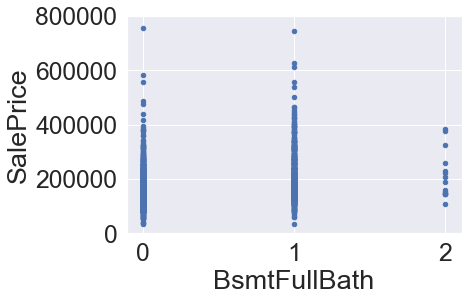

In [195]:
plot_Bivariate(22)

    --------------------------------------------------------------------------------

# 22 Saleprice vs BsmtUnfSF:

    BsmtUnfSF: Unfinished square feet of basement area

    TotalBsmtSF: Total square feet of basement area

In [196]:
feat_list.index('BsmtUnfSF')

23

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtUnfSF
BsmtUnfSF 0.214479105546969
TotalBsmtSF 0.38641980624215627


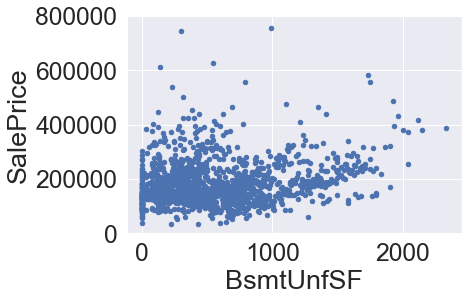

In [197]:
plot_Bivariate(23)
print('BsmtUnfSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtUnfSF'])
print('TotalBsmtSF',corrmat.nlargest(k, 'SalePrice')['SalePrice']['TotalBsmtSF'])

**Discussion**:

    You can see, the relation between saleprice and BsmtUnfSF is positive which
    mean BsmtUnfSF  does  have high impact on House Sale Price. 
    i am keeping it as it is.
    --------------------------------------------------------------------------------

    

## 23 Saleprice vs BedroomAbvGr



In [198]:
feat_list.index('BedroomAbvGr')

24

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BedroomAbvGr


0.1682131543007415

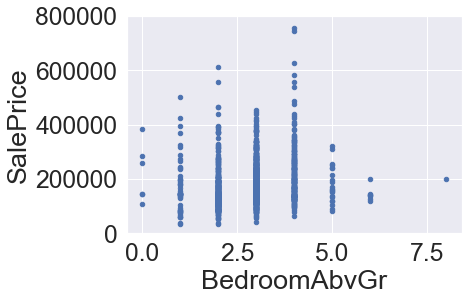

In [199]:
plot_Bivariate(24)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['BedroomAbvGr']

In [200]:
outlr_train['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [201]:
outlr_train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [202]:
outlr_train.groupby(['SalePrice','BedroomAbvGr']).filter(lambda x: 
((((x['BedroomAbvGr']>=7).any())))) .reset_index()[['Id','SalePrice','BedroomAbvGr']]





Id  SalePrice  BedroomAbvGr
0  636     200000             8

In [203]:
#takin mean of the data
gr_mean=np.mean(outlr_train['BedroomAbvGr'])
gr_mean

2.8664383561643834

In [204]:
outlr_train['BedroomAbvGr'][outlr_train['Id']==636]=3


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BedroomAbvGr


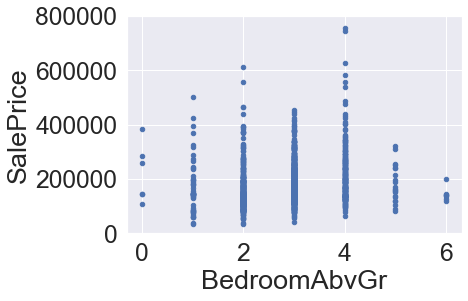

In [205]:
plot_Bivariate(24)

**Discussion**:

    You can see, the relation between saleprice and BedroomAbvGr is positive which
    mean BedroomAbvGr  does  have high impact on House Sale Price. 
    this feature give us some important information but record on id 636 have 8 bedroom,
    which feels to me outlier and i set back to mean of 3 bedrooms
    --------------------------------------------------------------------------------

    

## 24 Saleprice and ScreenPorch
    
    3SsnPorch: Three season porch area in square feet

    ScreenPorch: Screen porch area in square feet

In [206]:
feat_list.index('ScreenPorch')

25

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


ScreenPorch
3SsnPorch 0.04458366533574792
ScreenPorch 0.11144657114291048


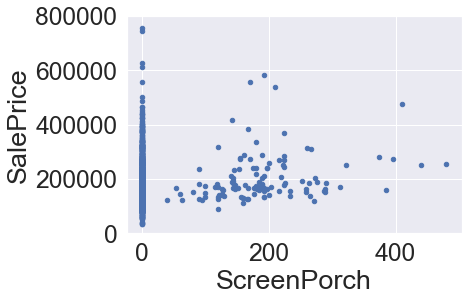

In [207]:
plot_Bivariate(25)
print('3SsnPorch',corrmat.nlargest(k, 'SalePrice')['SalePrice']['3SsnPorch'])
print('ScreenPorch',corrmat.nlargest(k, 'SalePrice')['SalePrice']['ScreenPorch'])

**Discussion**:

    You can see, the relation between saleprice and Screen porch is positive which
    mean Screen porch does at least have impact on House Sale Price. 
    this feature give us some important information, when you read further i have
    remove similar 3SsnPorch because i decided to keep Screenporch and drop 3Ssnporch.
    --------------------------------------------------------------------------------

    

## 25 Saleprice vs PoolArea:

    PoolArea: Pool area in square feet

    PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [208]:
feat_list.index('PoolArea')

26

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


PoolArea
PoolArea 0.09240354949187278


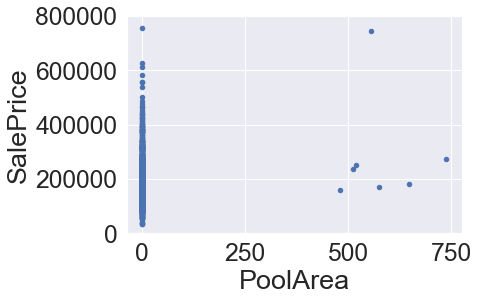

In [209]:
plot_Bivariate(26)
print('PoolArea',corrmat.nlargest(k, 'SalePrice')['SalePrice']['PoolArea'])
# print('PoolQC',corrmat.nlargest(k, 'SalePrice')['SalePrice']['PoolQC'])

In [210]:
outlr_train['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [211]:
outlr_train['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

**Discussion**:

    You can see, the relation between saleprice and PoolArea are positive which
    mean PoolArea does at least have impact on House Sale Price. 
    this feature give us some important information but most of the houses have 
    no poool, there is also another  pool   similar feature PoolQaulity which also shows
    most of the houses have no pool. i think it will better to remove both of 
    these feature 


    

In [212]:
outlr_train=outlr_train.drop('PoolQC',axis=1)

outlr_train=outlr_train.drop('PoolArea',axis=1)

    --------------------------------------------------------------------------------



## 26 Saleprice vs MoSold
    
        MoSold: Month Sold

In [213]:
feat_list.index('MoSold')

27

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


MoSold


0.04643224522381936

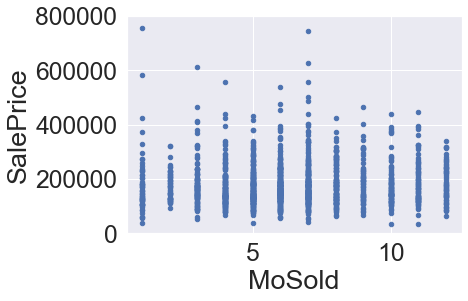

In [214]:
plot_Bivariate(27)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['MoSold']

In [215]:
outlr_train['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [216]:
outlr_train['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

**Discussion**:

    You can see, the relation between saleprice and MoSold are positive which
    mean Moth Sold does at least have impact on House Sale Price. 
    this feature give us some important information, like house with price
    less than 400000 are sold more frequently in all catagories of months from 1 to 12
    and houses with price greater than 400000 can also be sold but are dificult to sold
    in rare cases. so i am going to keep this feature.
    In case of Outlier i am not able to find any clue for now
    --------------------------------------------------------------------------------

    

## 27 Saleprice vs 3SsnPorch
    A screened porch is a type of porch or similar structure on or near the exterior of 
    a house that has been covered by window screens in order to hinder insects, debris, 
    and other undesirable objects from entering the area inside the screen
    
    3SsnPorch: Three season porch area in square feet

    ScreenPorch: Screen porch area in square feet

In [217]:
feat_list.index('3SsnPorch')

28

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


3SsnPorch
3SsnPorch 0.04458366533574792


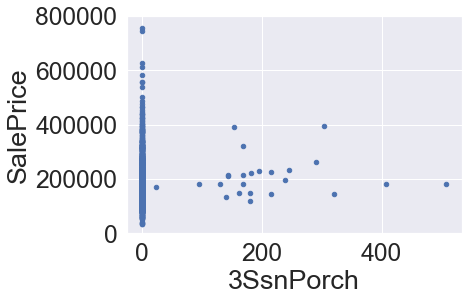

In [218]:
plot_Bivariate(28)
print('3SsnPorch',corrmat.nlargest(k, 'SalePrice')['SalePrice']['3SsnPorch'])


**Discussion**:

    You can see, the relation between saleprice and 3SsnPorch is positive which
    mean 3SsnPorch does have  impact on House Sale
    Price. I think it is better to remove this feature because  most of the 
    houses have no information about this feature, Hence, there is another similar 
    feature ScreenPorch with  0.11 relationship with saleprice we should drop 
    3SsnProch. Let's drop it.

    

In [219]:
outlr_train=outlr_train.drop('3SsnPorch',axis=1)

    --------------------------------------------------------------------------------

## 28 Saleprice and BsmtFinSF2
    
       BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

       BsmtFinSF2: Type 2 finished square feet

In [220]:
feat_list.index('BsmtFinSF2')

29

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtFinSF2


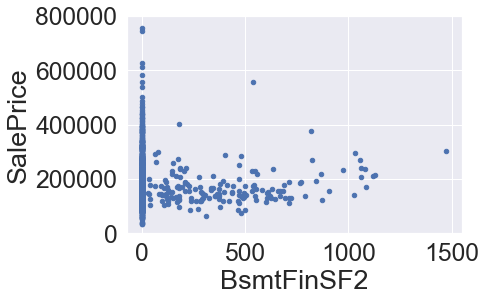

In [221]:
plot_Bivariate(29)
# print('BsmtFinSF2',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtFinSF2'])
# print('BsmtFinSF1',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtFinSF1'])

**Discussion**:

    You can see, BsmtFinSF2 is optional feature and have negative relationship with
    Saleprice. As we know we have another similar feature Basement finish type1 is
    not optional and have positive relationship of  0.3864 with saleprice i think 
    it will be better to use  BsmtFinSF1 and drop the BsmtFinSF2.let's drop it 

    

In [222]:
outlr_train=outlr_train.drop('BsmtFinSF2',axis=1)

    --------------------------------------------------------------------------------

## 29 Saleprice vs BsmtHalfBath
        Basement half bathrooms
        

In [223]:
feat_list.index('BsmtHalfBath')

30

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


BsmtHalfBath
BsmtHalfBath -0.016844154297359294
BsmtFullBath 0.22712223313149718


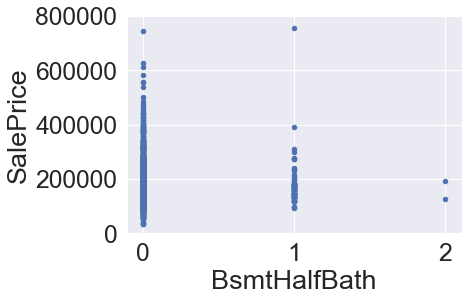

In [224]:
plot_Bivariate(30)
print('BsmtHalfBath',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtHalfBath'])
print('BsmtFullBath',corrmat.nlargest(k, 'SalePrice')['SalePrice']['BsmtFullBath'])

**Discussion**:

    You can see, BsmtHalfBath is catagorical feature for 1,2 and 0 and the relationship
    between the houseprice and BsmtHalfBath is negative but you don't worry because 
    there is another similar feature BsmtFullBath where relationship is 0.2271. i think,
    it will be batter to use BsmtFullBath only. Lets drop the BsmtHalfBath.

    

In [225]:
outlr_train=outlr_train.drop('BsmtHalfBath',axis=1)

    --------------------------------------------------------------------------------

## 30. Saleprice vs MiscVal:

      Value of miscellaneous feature

    

In [226]:
feat_list.index('MiscVal')

31

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


MiscVal


-0.02118957964030379

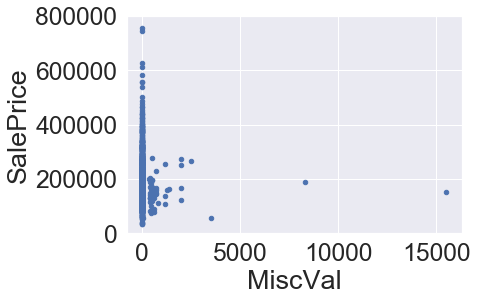

In [227]:
plot_Bivariate(31)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['MiscVal']

**Discussion**:

    You can see, the relation between saleprice and MiscVal is negative which
    mean MiscVal does not have really high impact on House Sale
    Price. I think it is better to remove this feature because  most of the 
    houses have no information about this feature, Hence, because of -ve relationship
    with house saleprice we should drop it.

    

In [228]:
outlr_train=outlr_train.drop('MiscVal',axis=1)

    --------------------------------------------------------------------------------

## 31. Saleprice vs LowQualFinSF:
       Low quality finished square feet (all floors)

In [229]:
feat_list.index('LowQualFinSF')

32

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LowQualFinSF


-0.02560613000068015

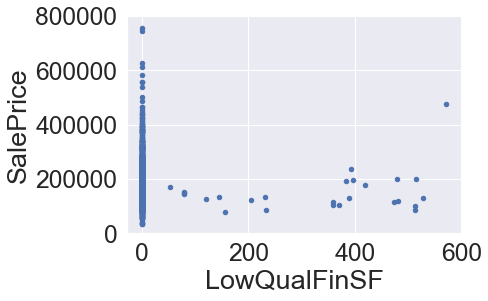

In [230]:
plot_Bivariate(32)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['LowQualFinSF']

**Discussion**:

    You can see, the relation between saleprice and LowQualFinSF are -ve which
    mean LowQualFinSF does not have really high impact on House Sale
    Price. I think it is better to remove this feature because  most of the 
    houses have no information about this feature, Hence, because of -ve relationship
    with house saleprice we should drop it.

    

In [231]:
outlr_train=outlr_train.drop('LowQualFinSF',axis=1)

    --------------------------------------------------------------------------------

## 32 SalePrice vs YrSold:
    
        Year Sold

In [232]:
feat_list.index('YrSold')

33

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


YrSold


-0.028922585168730426

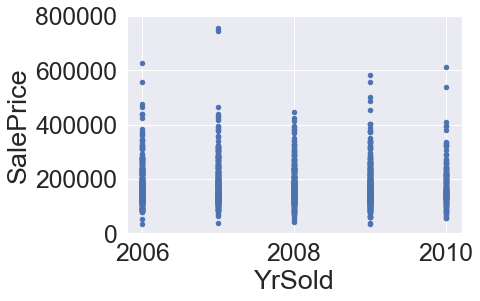

In [233]:
plot_Bivariate(33)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['YrSold']

**Discussion**:

    You can see, the relation between saleprice and yr are -ve which
    mean yrSold does not have really high impact on House Sale
    Price. I think it is better to remove this feature because of -ve relationship
    with house saleprice

    

In [234]:
outlr_train=outlr_train.drop('YrSold',axis=1)

    --------------------------------------------------------------------------------

## 33.saleprice vs OverallCond
    OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [235]:
feat_list.index('OverallCond')

34

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


OverallCond


-0.0778558940486776

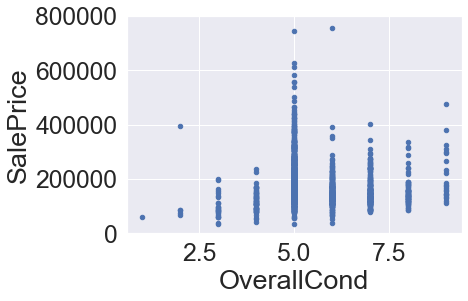

In [236]:
plot_Bivariate(34)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['OverallCond']

In [237]:
outlr_train['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [238]:

corrmat.nlargest(k, 'SalePrice')['SalePrice']['OverallQual']

0.7909816005838047

**Discussion**:

    You can see, the relationship between saleprice and OverallCondition is negative
    but if you look at the plot it looks clear to us that the condition
    of houses increase with increasing the house saleprice. i think this feature
    should be very impactive but because of catagorical nature of this feature 
    i am not sure yet why we have -ve relationship maybe lettr on will deal with but
    there is another similar feature OverallQual which also define quality use in the
    house. So, the good it's quality the better it will have condition. i think 
    in this scanario we should drop OverallCondition feature because OverallQual
    have same role.lets drop it 
    

In [239]:
outlr_train=outlr_train.drop('OverallCond',axis=1)

    --------------------------------------------------------------------------------
    

## 34.Saleprice vs MSSubClass
    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
    

In [240]:
feat_list.index('MSSubClass')

35

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


MSSubClass


-0.08428413512659523

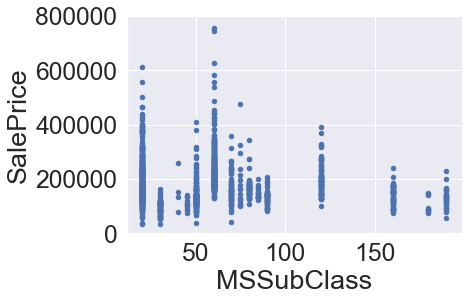

In [241]:
plot_Bivariate(35)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['MSSubClass']

**Discussion**:

    You can see, the relation between saleprice and MSSubClass are -ve which
    mean MSSubClass  does not have really high impact on House Sale
    Price. I think it is better to remove this feature because of -ve relationship
    with house saleprice
   
    

In [242]:
outlr_train=outlr_train.drop('MSSubClass',axis=1)

    --------------------------------------------------------------------------------
    

## 35 Saleprice vs EnclosedPorch:
    EnclosedPorch: Enclosed porch area in square feet
                   a covered shelter projecting in front of the entrance of a building


In [243]:
feat_list.index('EnclosedPorch')

36

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


EnclosedPorch


-0.12857795792595636

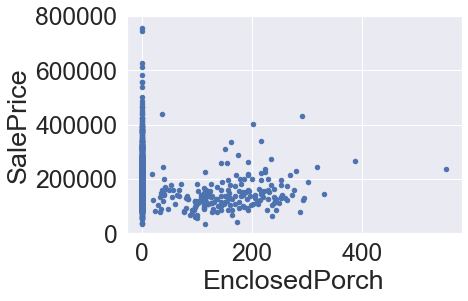

In [244]:
plot_Bivariate(36)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['EnclosedPorch']

In [245]:
corrmat.nlargest(k, 'SalePrice')['SalePrice']['OpenPorchSF']

0.31585622711605577

**Discussion**:

    As we know, EnclosedPorch is  covered shelter projecting in front of the entrance 
    of a building. Before deciding either we should keep this feature or not, There is 
    another feature OpenPorchSF where relationship between saleprice and OpenPorSF is 
    0.315, Because we have other similar related feature i think it will better to 
    remove EnclosedPorch for now.
   

In [246]:
outlr_train=outlr_train.drop('EnclosedPorch',axis=1)

    --------------------------------------------------------------------------------
    

## 36.Saleprice vs KitchenAbvGr:

    

In [247]:
feat_list.index('KitchenAbvGr')

37

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


KitchenAbvGr


-0.1359073708421417

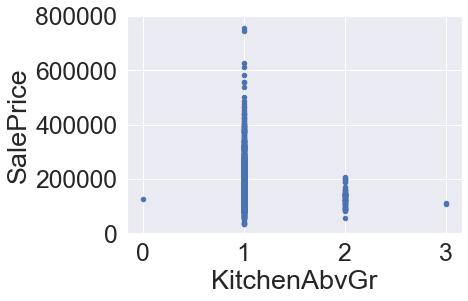

In [248]:
plot_Bivariate(37)
corrmat.nlargest(k, 'SalePrice')['SalePrice']['KitchenAbvGr']

**Discussion**:

    You can see, the relation between saleprice and KitchenAbGR are -ve which
    mean Kitchen abov the ground does not have really high impact on House Sale
    Price. I think it is better to remove this feature because of -ve relationship
    with house saleprice
   
    

In [249]:
outlr_train=outlr_train.drop('KitchenAbvGr',axis=1)

    --------------------------------------------------------------------------------
    